In [6]:
from platform import python_version
print(python_version())

3.8.2


In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from utils.get_summary_data import compile_summary
from utils.paths import SetupPaths

In [2]:
plt.rcParams.update({'font.size':22})
paths = SetupPaths()


In [3]:
style = {"dark":"dashed","hydro":"solid"}
palette = { "dark":"#044751","hydro": "#B6DAFF", 
           "Illustris":"#668AFF","TNG": "#B6DAFF", # "TNG": "#7B55F3"
           "Illustris dark": "#009292", "Illustris hydro": "#B6DAFF",
           "TNG dark": "#930200", "TNG hydro": "#FFB5DC",
           "All Pairs":"#668AFF","Major Pairs": "#7B55F3",
           "Minor Pairs":'#FFB201',"Minor Plus Pairs":"#FF6300",
           "Extra":"#DE2280","Stellar":"#0A68DD",
           "Halo":"#4B0094","Max Halo":"#FF6BB7"}
alphaVal = {"Major":0.7,"Minor":0.4}

___ 
# z = 0 

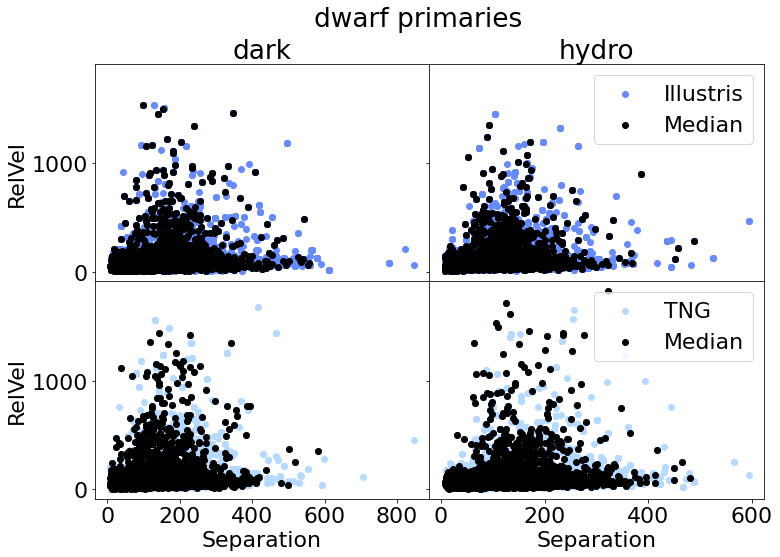

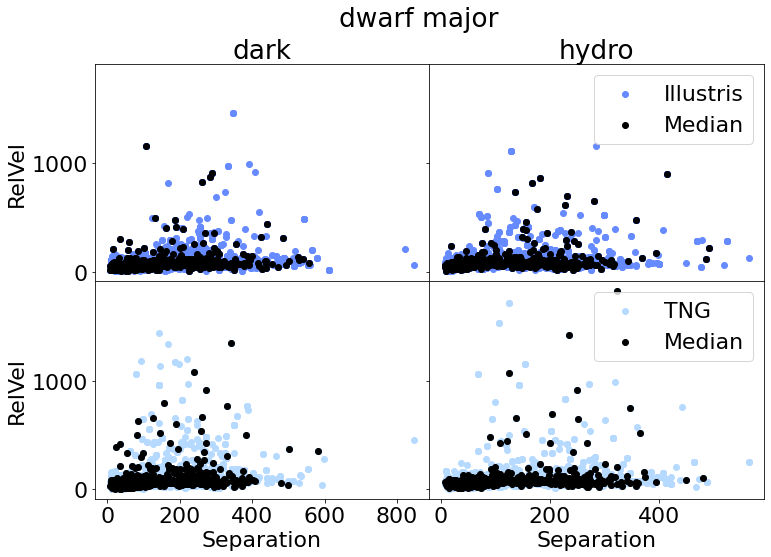

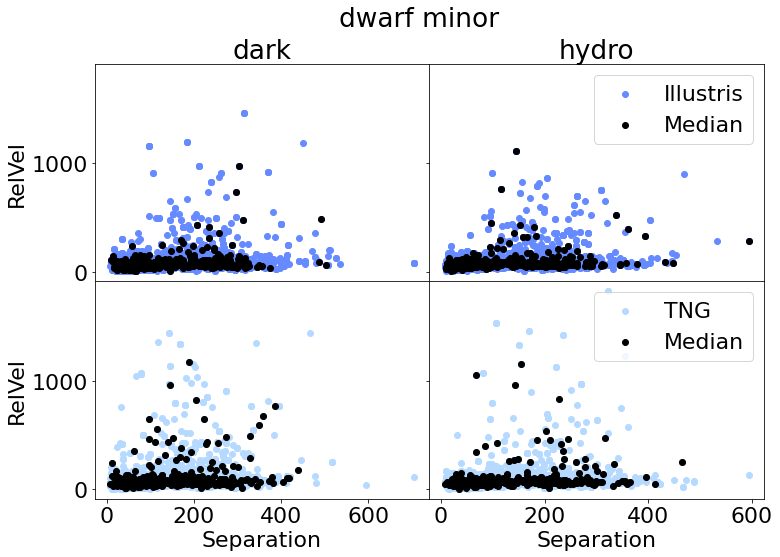

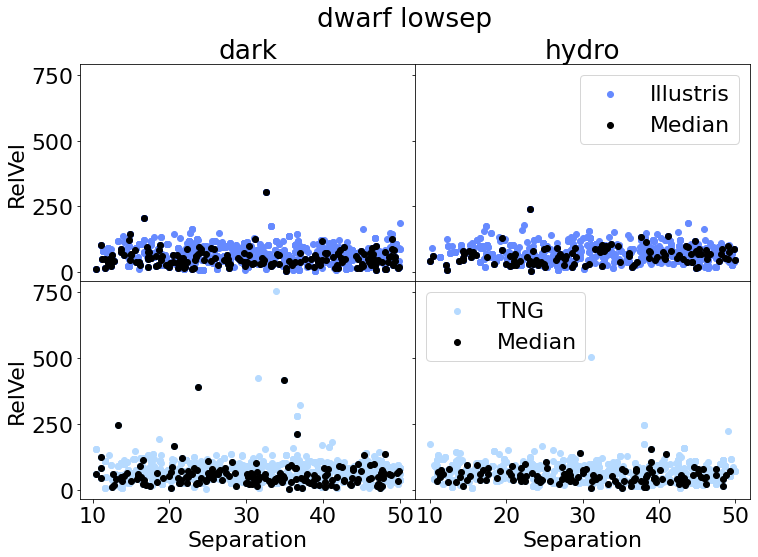

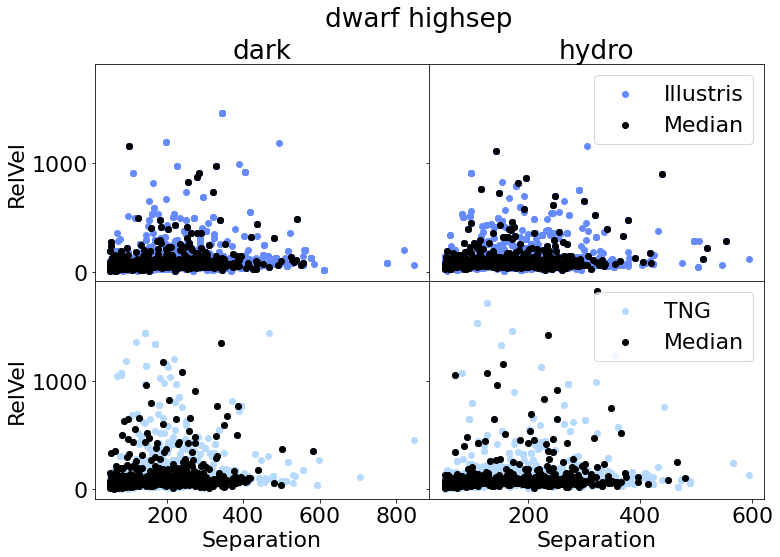

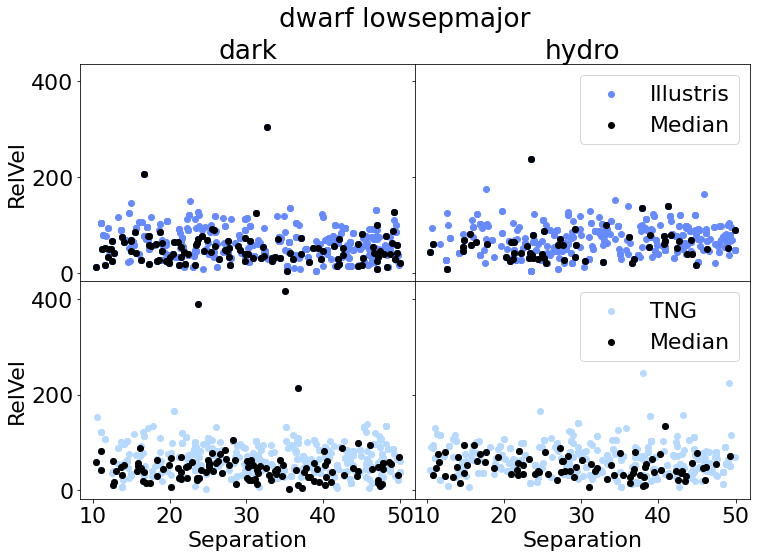

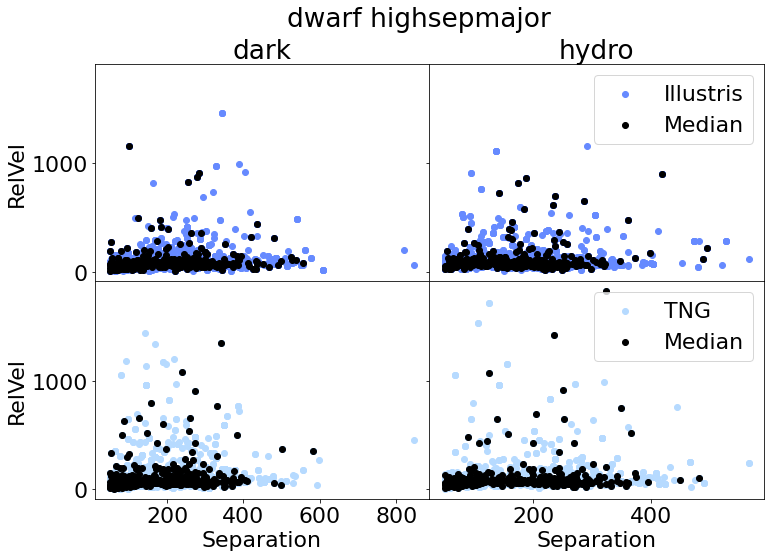

KeyError: 'lowvel'

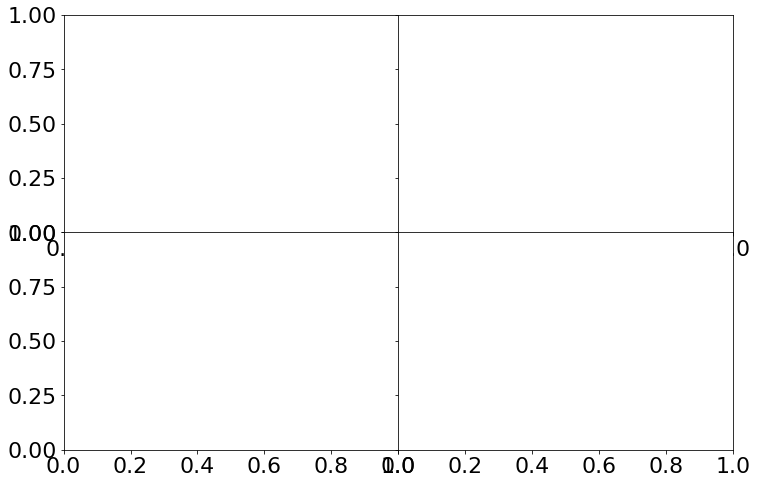

In [83]:
subsets = ["primaries", "major", "minor", 
           "lowsep", "highsep", "lowsepmajor", "highsepmajor", 
           "lowvel", "highvel", "lowvelmajor", "highvelmajor"]

for it_subset in subsets:
# for it_subset in ["major", "minor"]:

    size = "dwarf"
    subset = it_subset

    fig,ax = plt.subplots(2,2,figsize=(12,8),sharey=True)
    plt.subplots_adjust(wspace=0,hspace=0)

    for col,it_phys in enumerate(["dark","hydro"]):
        for row, it_sim in enumerate(["Illustris","TNG"]):
            inst = compile_summary(sim=it_sim, phys=it_phys, size=size, subset=it_subset)
            if it_sim == "Illustris":
                snapnum = 135
            else:
                snapnum = 99
            data_summary = inst.get_snapshot(snapnum=snapnum)

            # create mask to get median stellar mass results
            mask = data_summary["Realization"]==-1
            seps = data_summary["Separation"]
            vels = data_summary["RelVel"]

            ax[row][col].scatter(seps, vels,color=palette[it_sim],label=it_sim)
            ax[row][col].scatter(seps[mask], vels[mask],color='black',label="Median")
            
            if row == 0:
                ax[0][col].set(title=it_phys)
            
            if col == 1:
                ax[row][1].legend()

            ax[row][0].set(ylabel="RelVel")
            ax[1][col].set(xlabel="Separation")
    plt.suptitle(f"{size} {it_subset}")
    plt.legend()
    plt.savefig(f"../plots/pairs_z0_newfields/{size}_{subset}_sepvsvel.pdf",bbox_inches='tight')
    plt.show()

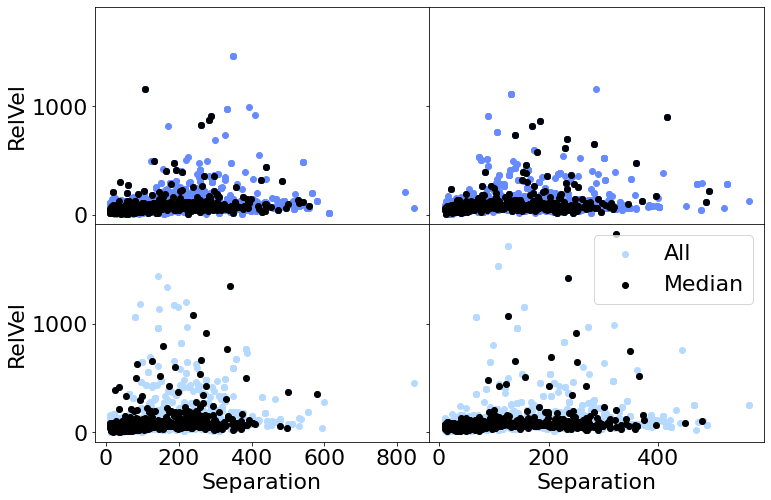

In [4]:
size = "dwarf"
subset = "major"

fig,ax = plt.subplots(2,2,figsize=(12,8),sharey=True)
plt.subplots_adjust(wspace=0,hspace=0)

for col,it_phys in enumerate(["dark","hydro"]):
    for row, it_sim in enumerate(["Illustris","TNG"]):
        inst = compile_summary(sim=it_sim, phys=it_phys, size=size, subset=subset)
        if it_sim == "Illustris":
            snapnum = 135
        else:
            snapnum = 99
        data_summary = inst.get_snapshot(snapnum=snapnum)

        # create mask to get median stellar mass results
        mask = data_summary["Realization"]==-1
        seps = data_summary["Separation"]
        vels = data_summary["RelVel"]

        ax[row][col].scatter(seps, vels,color=palette[it_sim],label="All")
        ax[row][col].scatter(seps[mask], vels[mask],color='black',label="Median")

        ax[row][0].set(ylabel="RelVel")
        ax[1][col].set(xlabel="Separation")

plt.legend()
plt.savefig(f"../plots/pairs_z0_newfields/{size}_{subset}_sepvsvel.pdf",bbox_inches='tight')
plt.show()


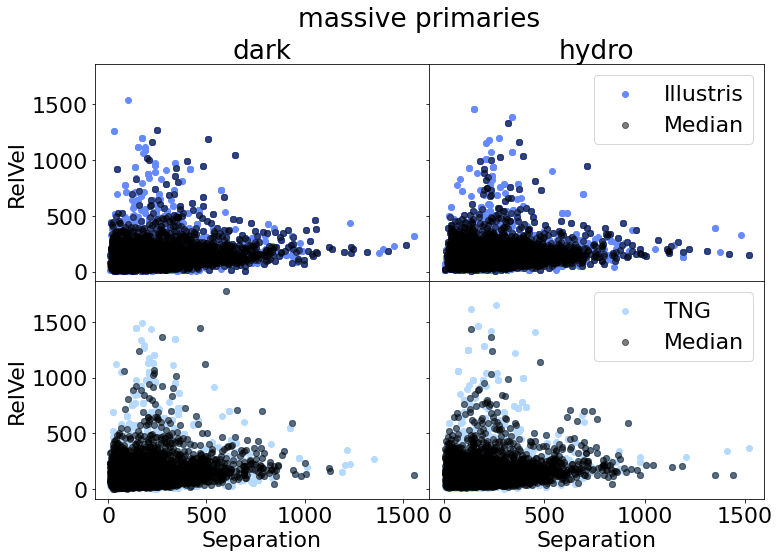

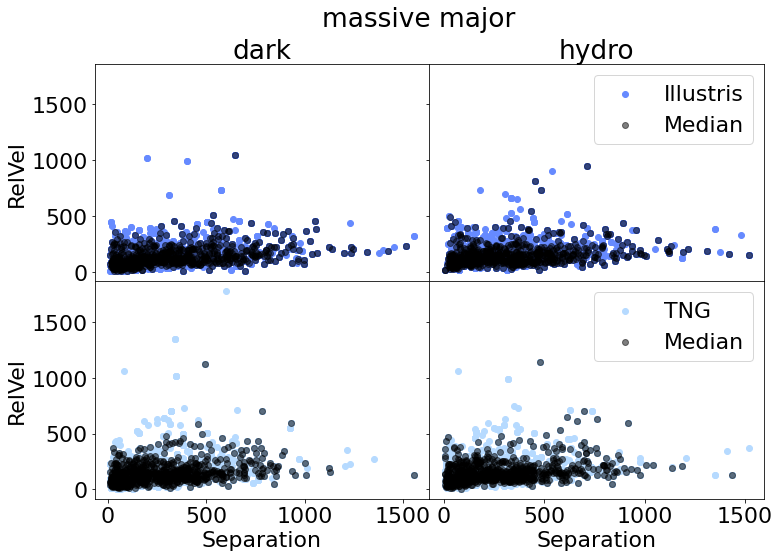

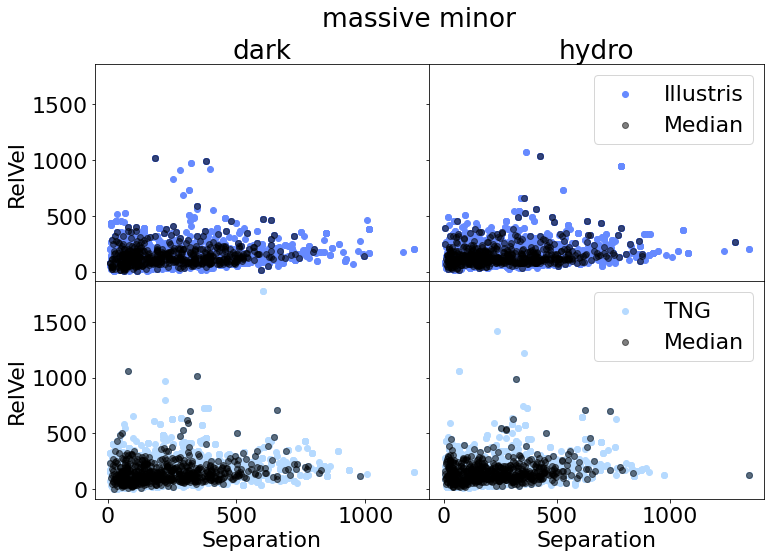

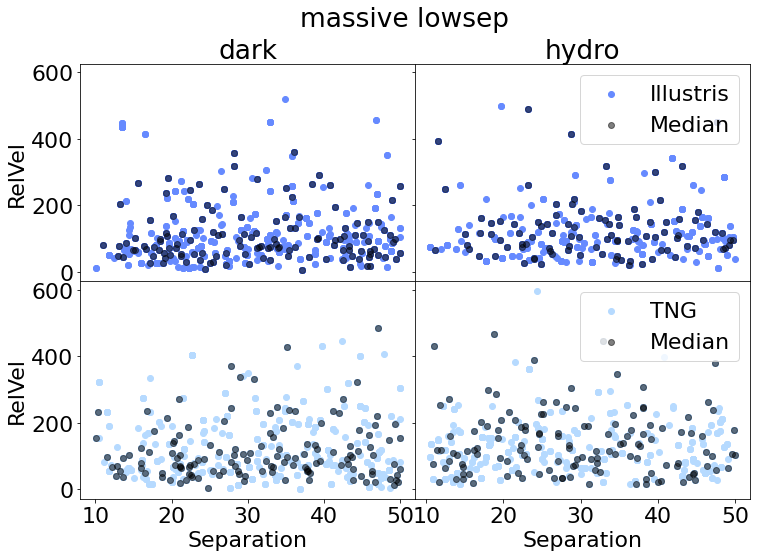

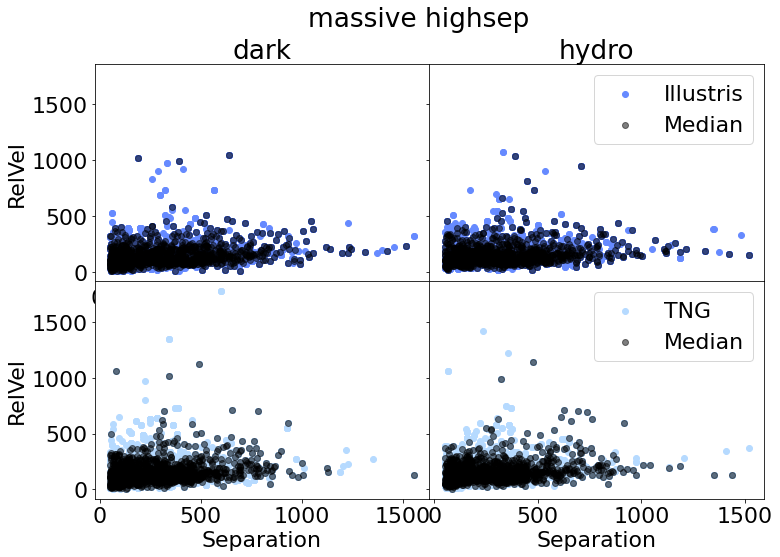

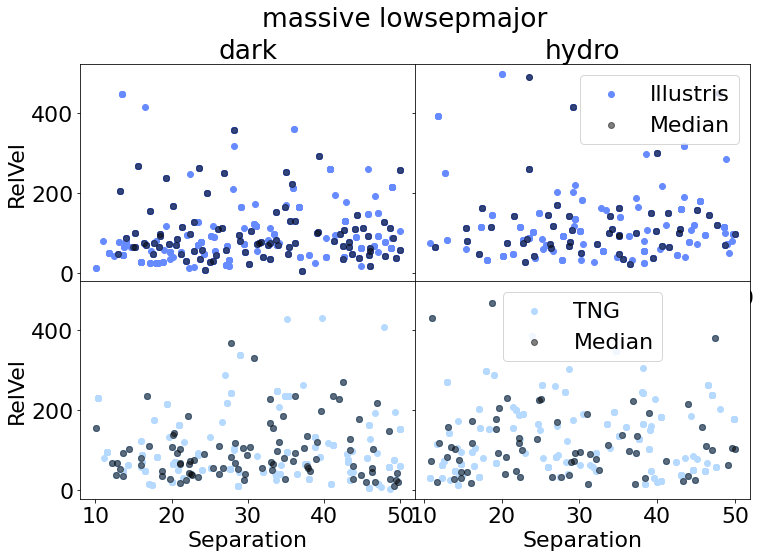

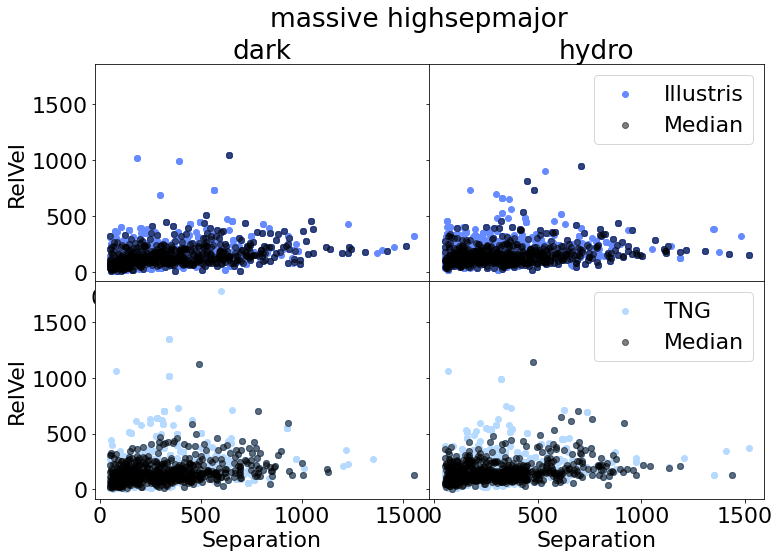

In [70]:
for it_subset in ["primaries", "major", "minor", "lowsep", "highsep", "lowsepmajor", "highsepmajor"]:
# for it_subset in ["major", "minor"]:

    size = "massive"
    subset = it_subset

    fig,ax = plt.subplots(2,2,figsize=(12,8),sharey=True)
    plt.subplots_adjust(wspace=0,hspace=0)

    for col,it_phys in enumerate(["dark","hydro"]):
        for row, it_sim in enumerate(["Illustris","TNG"]):
            inst = compile_summary(sim=it_sim, phys=it_phys, size=size, subset=it_subset)
            if it_sim == "Illustris":
                snapnum = 135
            else:
                snapnum = 99
            data_summary = inst.get_snapshot(snapnum=snapnum)

            # create mask to get median stellar mass results
            mask = data_summary["Realization"]==-1
            seps = data_summary["Separation"]
            vels = data_summary["RelVel"]

            ax[row][col].scatter(seps, vels, color=palette[it_sim], label=it_sim)
            ax[row][col].scatter(seps[mask], vels[mask], color='black', alpha=0.5, label="Median")
            
            if row == 0:
                ax[0][col].set(title=it_phys)
            
            if col == 1:
                ax[row][1].legend()

            ax[row][0].set(ylabel="RelVel")
            ax[1][col].set(xlabel="Separation")
    plt.suptitle(f"{size} {it_subset}")
    plt.legend()
    plt.savefig(f"../plots/pairs_z0_newfields/{size}_{subset}_sepvsvel.pdf",bbox_inches='tight')
    plt.show()

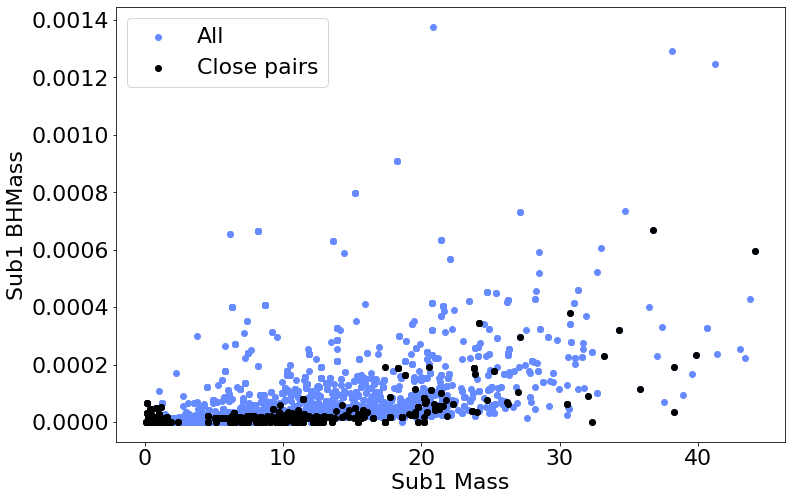

In [16]:
val1 = "Sub1 Mass"
val2 = "Sub1 BHMass"

maj = compile_summary(sim="Illustris", phys="hydro", size="dwarf", subset="major")
majsum = maj.get_snapshot(snapnum=135)

lowmaj = compile_summary(sim="Illustris", phys="hydro", size="dwarf", subset="lowsepmajor")
lowmajsum = lowmaj.get_snapshot(snapnum=135)

fig,ax = plt.subplots(1,1,figsize=(12,8),sharey=True)
plt.subplots_adjust(wspace=0)

ax.scatter(majsum[val1], majsum[val2],color=palette["Illustris"],label="All")
ax.scatter(lowmajsum[val1], lowmajsum[val2],color="black",label="Close pairs")
# ax.set_ylim(-0.1e-5,8e-5)

ax.set(xlabel=val1, ylabel=val2)

plt.legend()
plt.show()


# Create summary data

In [26]:
size = "massive"
subset1 = "major"
subset2 = "minor"

data_summary1 = {}
for it_sim in ["Illustris","TNG"]:
    data_summary1[it_sim] = {}
    
    for it_phys in ["dark","hydro"]:
        inst = compile_summary(sim=it_sim, phys=it_phys, size=size, subset=subset1, redshift_cutoff=3.9)
        data_summary1[it_sim][it_phys] = inst.get_data()
        
        print(f"done with {it_sim} {it_phys}")
        
data_summary2 = {}
for it_sim in ["Illustris","TNG"]:
    data_summary2[it_sim] = {}
    
    for it_phys in ["dark","hydro"]:
        inst = compile_summary(sim=it_sim, phys=it_phys, size=size, subset=subset2, redshift_cutoff=3.9)
        data_summary2[it_sim][it_phys] = inst.get_data()
        
        print(f"done with {it_sim} {it_phys}")

0 does not exist -- skipping
1 does not exist -- skipping
2 does not exist -- skipping
3 does not exist -- skipping
4 does not exist -- skipping
5 does not exist -- skipping
6 does not exist -- skipping
7 does not exist -- skipping
8 does not exist -- skipping
9 does not exist -- skipping
10 does not exist -- skipping
11 does not exist -- skipping
12 does not exist -- skipping
13 does not exist -- skipping
14 does not exist -- skipping
54 does not exist -- skipping
done with Illustris dark
0 does not exist -- skipping
1 does not exist -- skipping
2 does not exist -- skipping
3 does not exist -- skipping
4 does not exist -- skipping
5 does not exist -- skipping
6 does not exist -- skipping
7 does not exist -- skipping
8 does not exist -- skipping
9 does not exist -- skipping
10 does not exist -- skipping
11 does not exist -- skipping
12 does not exist -- skipping
13 does not exist -- skipping
14 does not exist -- skipping
54 does not exist -- skipping
113 does not exist -- skipping
done

In [28]:
data_summary1["Illustris"]["dark"].keys()

dict_keys(['Redshift', 'Snapshot', 'Number pairs', 'Number primaries', 'Ratio pairs', 'Median Separation', 'Median Separation Quartiles', 'Mean Separation', 'Mean Separation Std', 'Median RelVel', 'Median RelVel Quartiles', 'Mean RelVel', 'Mean RelVel Std', 'Mean Lowsep Counts', 'Mean Lowsep Counts Std'])

Optional keys: 
- 'Redshift' 
- 'Snapshot' 
- 'Number pairs'
- 'Number primaries'
- 'Ratio pairs'
- 'Median Separation'
- 'Median Separation Quartiles'
- 'Mean Separation'
- 'Mean Separation Std'
- 'Median RelVel'
- 'Median RelVel Quartiles'
- 'Mean RelVel'
- 'Mean RelVel Std'

___ 
# Separation

In [19]:
# data_summary1["Illustris"]["dark"]["Number pairs"]

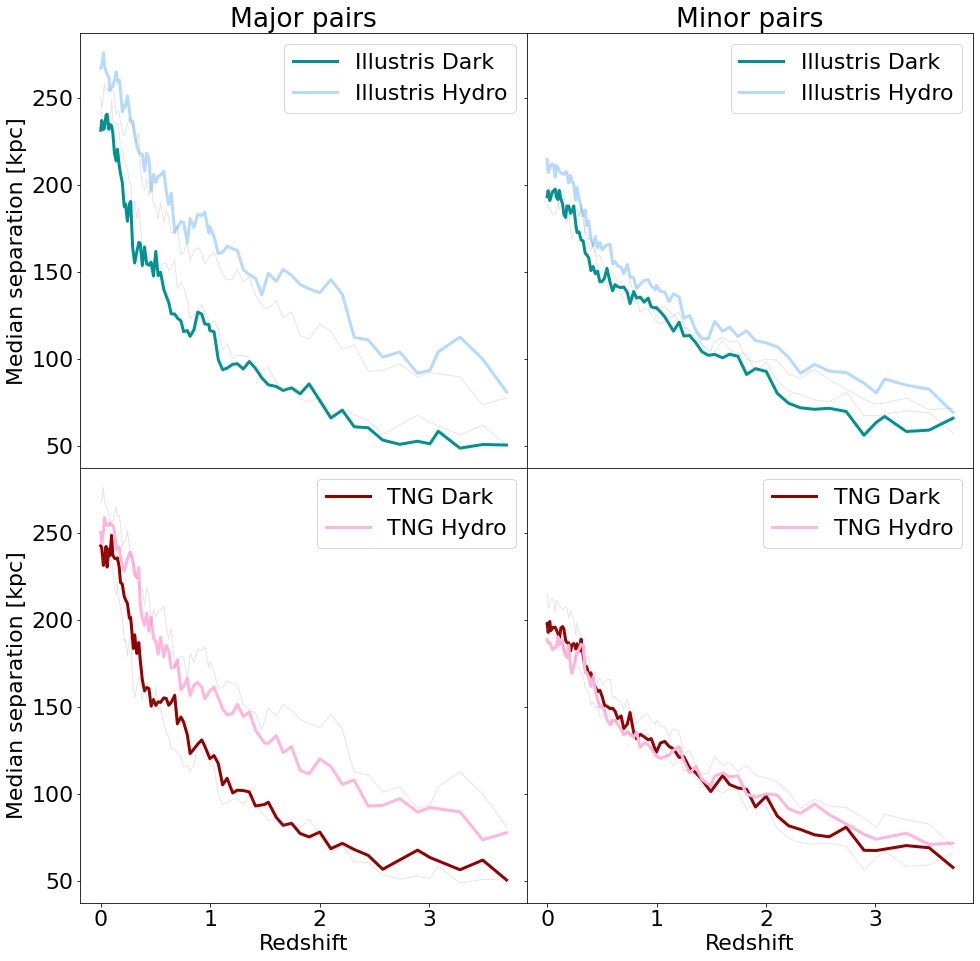

In [29]:
fig,ax = plt.subplots(2,2,figsize=(16,16),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0)

# plot for Illustris dark vs. TNG dark and Hydro v hydro for dwarfs

simNames = ["Illustris", "TNG"]
keytoplot = "Median Separation"
keylabel = "Median separation [kpc]"
altsize = 1
altalpha = 0.2

# left top plot (major pairs in Illustris)
ax[0][0].set_title("Major pairs")
ax[0][0].plot(data_summary1['Illustris']["dark"]['Redshift'], data_summary1['Illustris']["dark"][keytoplot], label="Illustris Dark", color=palette['Illustris dark'], lw=3)
ax[0][0].plot(data_summary1['Illustris']["hydro"]['Redshift'], data_summary1['Illustris']["hydro"][keytoplot], label="Illustris Hydro", color=palette['Illustris hydro'], lw=3)
ax[0][0].plot(data_summary1['TNG']["dark"]['Redshift'], data_summary1['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][0].plot(data_summary1['TNG']["hydro"]['Redshift'], data_summary1['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

# right top plot (Minor pairs in illustris)
ax[0][1].set_title("Minor pairs")
ax[0][1].plot(data_summary2['Illustris']["dark"]['Redshift'], data_summary2['Illustris']["dark"][keytoplot], label="Illustris Dark", color=palette['Illustris dark'], lw=3)
ax[0][1].plot(data_summary2['Illustris']["hydro"]['Redshift'], data_summary2['Illustris']["hydro"][keytoplot], label="Illustris Hydro", color=palette['Illustris hydro'], lw=3)
ax[0][1].plot(data_summary2['TNG']["dark"]['Redshift'], data_summary2['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][1].plot(data_summary2['TNG']["hydro"]['Redshift'], data_summary2['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

# left bottom plot (major pairs in tng)
ax[1][0].plot(data_summary1['TNG']["dark"]['Redshift'], data_summary1['TNG']['dark'][keytoplot], label="TNG Dark", color=palette['TNG dark'],lw=3)
ax[1][0].plot(data_summary1['TNG']["hydro"]['Redshift'], data_summary1['TNG']["hydro"][keytoplot],  label="TNG Hydro", color=palette['TNG hydro'], lw=3)
ax[1][0].plot(data_summary1['Illustris']["dark"]['Redshift'], data_summary1['Illustris']["dark"][keytoplot],color="grey",alpha=altalpha,lw=altsize)
ax[1][0].plot(data_summary1['Illustris']["hydro"]['Redshift'], data_summary1['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

# left bottom plot (minor pairs in tng)
ax[1][1].plot(data_summary2['TNG']["dark"]['Redshift'], data_summary2['TNG']['dark'][keytoplot], label="TNG Dark", color=palette['TNG dark'],lw=3)
ax[1][1].plot(data_summary2['TNG']["hydro"]['Redshift'], data_summary2['TNG']["hydro"][keytoplot],  label="TNG Hydro", color=palette['TNG hydro'], lw=3)
ax[1][1].plot(data_summary2['Illustris']["dark"]['Redshift'], data_summary2['Illustris']["dark"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][1].plot(data_summary2['Illustris']["hydro"]['Redshift'], data_summary2['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

for i in ax[1]:
    i.set_xlabel("Redshift")

ax[0][0].legend(loc="upper right")
ax[0][1].legend(loc="upper right")
ax[1][0].legend(loc="upper right")
ax[1][1].legend(loc="upper right")
ax[0][0].set_ylabel(keylabel)
ax[1][0].set_ylabel(keylabel)
# ax[1][0].set_ylabel("Separation")
# ax[1][1].set_ylabel("Separation")
plt.savefig(f"../plots/pairs_z0_newfields/{size}_separations.pdf",bbox_inches='tight')

plt.show()
    

___ 
# Velocity

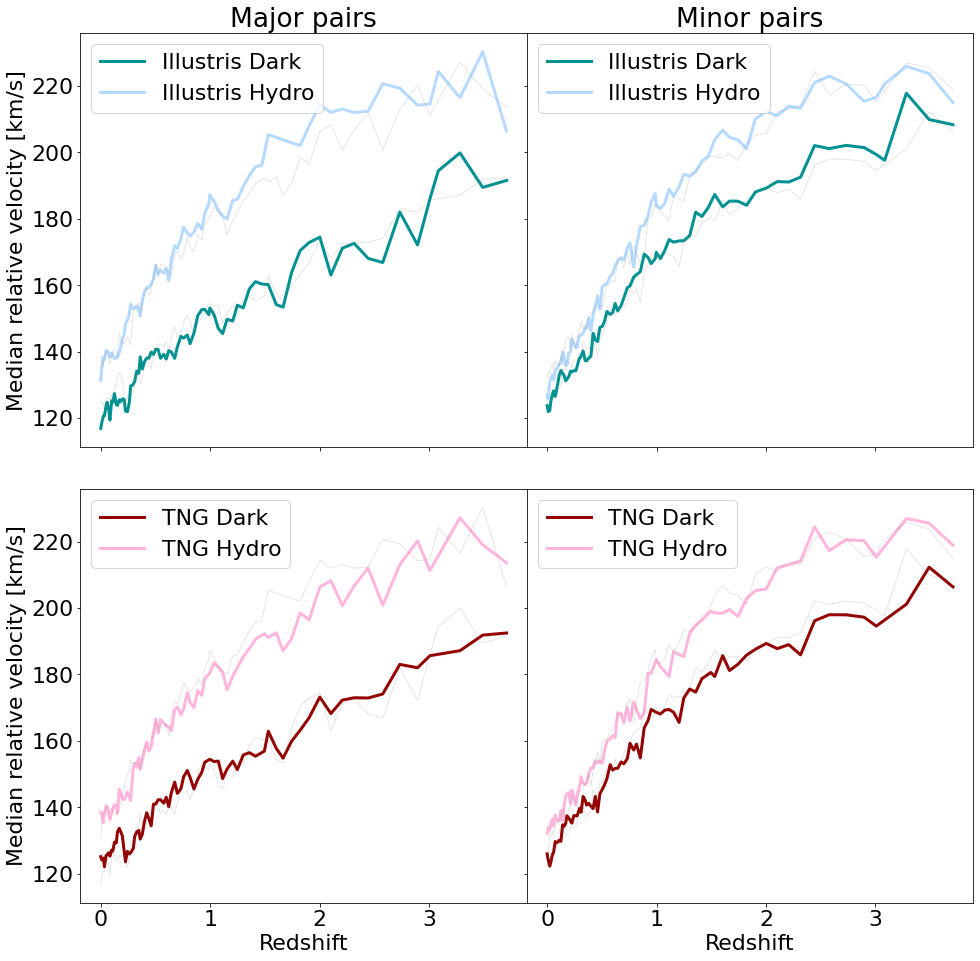

In [30]:

fig,ax = plt.subplots(2,2,figsize=(16,16),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.1)

# plot for Illustris dark vs. TNG dark and Hydro v hydro for dwarfs

simNames = ["Illustris", "TNG"]
keytoplot = "Median RelVel"
keylabel = "Median relative velocity [km/s]"
altsize = 1
altalpha = 0.2

# left top plot (major pairs in Illustris)
ax[0][0].set_title("Major pairs")
ax[0][0].plot(data_summary1['Illustris']["dark"]['Redshift'], data_summary1['Illustris']["dark"][keytoplot], label="Illustris Dark", color=palette['Illustris dark'], lw=3)
ax[0][0].plot(data_summary1['Illustris']["hydro"]['Redshift'], data_summary1['Illustris']["hydro"][keytoplot], label="Illustris Hydro", color=palette['Illustris hydro'], lw=3)
ax[0][0].plot(data_summary1['TNG']["dark"]['Redshift'], data_summary1['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][0].plot(data_summary1['TNG']["hydro"]['Redshift'], data_summary1['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

# right top plot (Minor pairs in illustris)
ax[0][1].set_title("Minor pairs")
ax[0][1].plot(data_summary2['Illustris']["dark"]['Redshift'], data_summary2['Illustris']["dark"][keytoplot], label="Illustris Dark", color=palette['Illustris dark'], lw=3)
ax[0][1].plot(data_summary2['Illustris']["hydro"]['Redshift'], data_summary2['Illustris']["hydro"][keytoplot], label="Illustris Hydro", color=palette['Illustris hydro'], lw=3)
ax[0][1].plot(data_summary2['TNG']["dark"]['Redshift'], data_summary2['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][1].plot(data_summary2['TNG']["hydro"]['Redshift'], data_summary2['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

# left bottom plot (major pairs in tng)
ax[1][0].plot(data_summary1['TNG']["dark"]['Redshift'], data_summary1['TNG']['dark'][keytoplot], label="TNG Dark", color=palette['TNG dark'],lw=3)
ax[1][0].plot(data_summary1['TNG']["hydro"]['Redshift'], data_summary1['TNG']["hydro"][keytoplot],  label="TNG Hydro", color=palette['TNG hydro'], lw=3)
ax[1][0].plot(data_summary1['Illustris']["dark"]['Redshift'], data_summary1['Illustris']["dark"][keytoplot],color="grey",alpha=altalpha,lw=altsize)
ax[1][0].plot(data_summary1['Illustris']["hydro"]['Redshift'], data_summary1['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

# left bottom plot (minor pairs in tng)
ax[1][1].plot(data_summary2['TNG']["dark"]['Redshift'], data_summary2['TNG']['dark'][keytoplot], label="TNG Dark", color=palette['TNG dark'],lw=3)
ax[1][1].plot(data_summary2['TNG']["hydro"]['Redshift'], data_summary2['TNG']["hydro"][keytoplot],  label="TNG Hydro", color=palette['TNG hydro'], lw=3)
ax[1][1].plot(data_summary2['Illustris']["dark"]['Redshift'], data_summary2['Illustris']["dark"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][1].plot(data_summary2['Illustris']["hydro"]['Redshift'], data_summary2['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)


for i in ax:
    for j in i:
        j.legend(loc="upper left")
        
for i in ax[1]:
    i.set_xlabel("Redshift")
    

ax[0][0].set_ylabel(keylabel)
ax[1][0].set_ylabel(keylabel)
plt.savefig(f"../plots/pairs_z0_newfields/{size}_velocities.pdf",bbox_inches='tight')

plt.show()
    

___
# Pair ratios

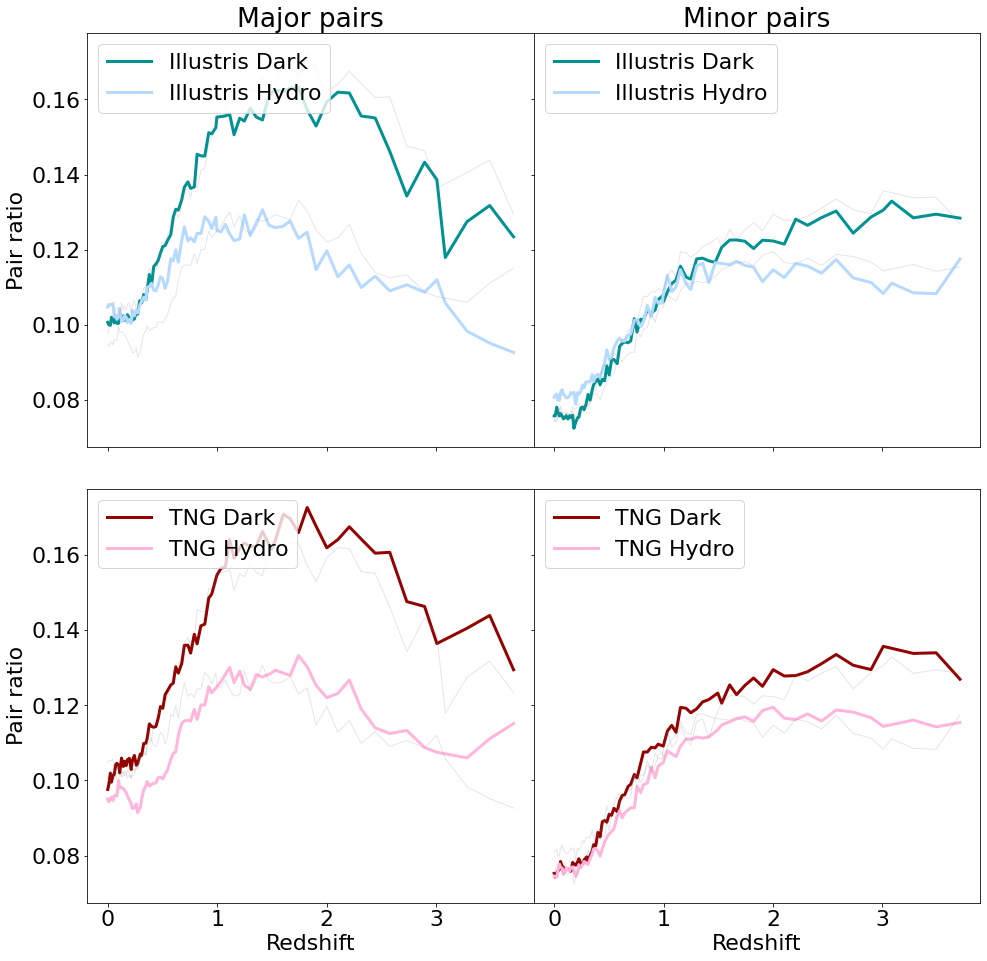

In [31]:

fig,ax = plt.subplots(2,2,figsize=(16,16),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.1)

# plot for Illustris dark vs. TNG dark and Hydro v hydro for dwarfs

simNames = ["Illustris", "TNG"]
keytoplot = "Ratio pairs"
keylabel = "Pair ratio"
altsize = 1
altalpha = 0.2

# left top plot (major pairs in Illustris)
ax[0][0].set_title("Major pairs")
ax[0][0].plot(data_summary1['Illustris']["dark"]['Redshift'], data_summary1['Illustris']["dark"][keytoplot], label="Illustris Dark", color=palette['Illustris dark'], lw=3)
ax[0][0].plot(data_summary1['Illustris']["hydro"]['Redshift'], data_summary1['Illustris']["hydro"][keytoplot], label="Illustris Hydro", color=palette['Illustris hydro'], lw=3)
ax[0][0].plot(data_summary1['TNG']["dark"]['Redshift'], data_summary1['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][0].plot(data_summary1['TNG']["hydro"]['Redshift'], data_summary1['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

# right top plot (Minor pairs in illustris)
ax[0][1].set_title("Minor pairs")
ax[0][1].plot(data_summary2['Illustris']["dark"]['Redshift'], data_summary2['Illustris']["dark"][keytoplot], label="Illustris Dark", color=palette['Illustris dark'], lw=3)
ax[0][1].plot(data_summary2['Illustris']["hydro"]['Redshift'], data_summary2['Illustris']["hydro"][keytoplot], label="Illustris Hydro", color=palette['Illustris hydro'], lw=3)
ax[0][1].plot(data_summary2['TNG']["dark"]['Redshift'], data_summary2['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][1].plot(data_summary2['TNG']["hydro"]['Redshift'], data_summary2['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)


# ax[1].plot(data_summary1['Illustris']["dark"]['Redshift'], data_summary1['Illustris']["dark"]['Median Separation'], color='grey',alpha=altalpha,lw=altsize)
# ax[1].plot(data_summary1['Illustris']["hydro"]['Redshift'], data_summary1['Illustris']["hydro"]['Median Separation'], label="Illustris", color='grey',alpha=altalpha,lw=altsize)
# ax[1].plot(data_summary1['TNG']["dark"]['Redshift'], data_summary1['TNG']["dark"]['Median Separation'], label="Dark", color=palette['TNG dark'], lw=3)
# ax[1].plot(data_summary1['TNG']["hydro"]['Redshift'], data_summary1['TNG']["hydro"]['Median Separation'], label="Hydro", color=palette['TNG hydro'], lw=3)

# left bottom plot (major pairs in tng)
ax[1][0].plot(data_summary1['TNG']["dark"]['Redshift'], data_summary1['TNG']['dark'][keytoplot], label="TNG Dark", color=palette['TNG dark'],lw=3)
ax[1][0].plot(data_summary1['TNG']["hydro"]['Redshift'], data_summary1['TNG']["hydro"][keytoplot],  label="TNG Hydro", color=palette['TNG hydro'], lw=3)
ax[1][0].plot(data_summary1['Illustris']["dark"]['Redshift'], data_summary1['Illustris']["dark"][keytoplot],color="grey",alpha=altalpha,lw=altsize)
ax[1][0].plot(data_summary1['Illustris']["hydro"]['Redshift'], data_summary1['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

# left bottom plot (minor pairs in tng)
ax[1][1].plot(data_summary2['TNG']["dark"]['Redshift'], data_summary2['TNG']['dark'][keytoplot], label="TNG Dark", color=palette['TNG dark'],lw=3)
ax[1][1].plot(data_summary2['TNG']["hydro"]['Redshift'], data_summary2['TNG']["hydro"][keytoplot],  label="TNG Hydro", color=palette['TNG hydro'], lw=3)
ax[1][1].plot(data_summary2['Illustris']["dark"]['Redshift'], data_summary2['Illustris']["dark"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][1].plot(data_summary2['Illustris']["hydro"]['Redshift'], data_summary2['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)



for i in ax:
    for j in i:
        j.legend(loc="upper left")
        
for i in ax[1]:
    i.set_xlabel("Redshift")
    

ax[0][0].set_ylabel(keylabel)
ax[1][0].set_ylabel(keylabel)
plt.savefig(f"../plots/pairs_z0_newfields/{size}_pairratio.pdf",bbox_inches='tight')


plt.show()
    

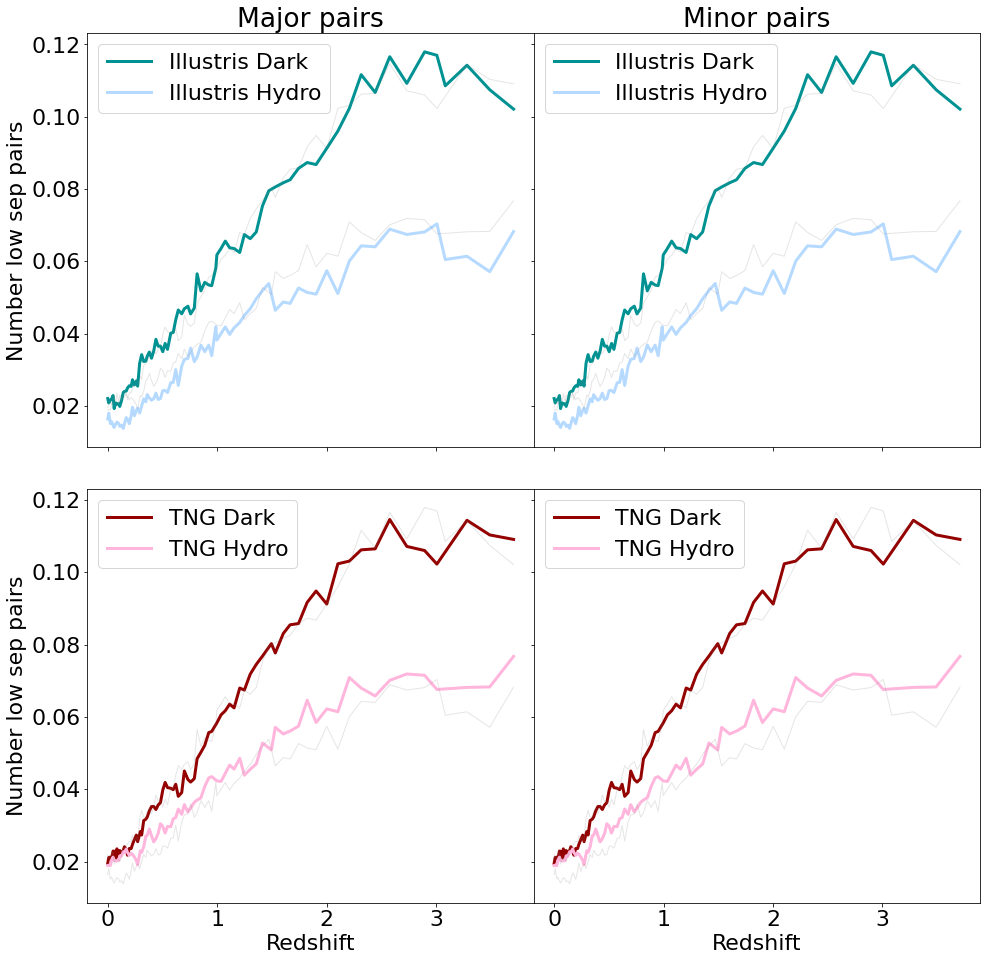

In [32]:

fig,ax = plt.subplots(2,2,figsize=(16,16),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.1)

# plot for Illustris dark vs. TNG dark and Hydro v hydro for dwarfs

simNames = ["Illustris", "TNG"]
keytoplot = 'Mean Lowsep Counts'
keylabel = "Number low sep pairs"
altsize = 1
altalpha = 0.2

# left top plot (major pairs in Illustris)
ax[0][0].set_title("Major pairs")
ax[0][0].plot(data_summary1['Illustris']["dark"]['Redshift'], data_summary1['Illustris']["dark"][keytoplot], label="Illustris Dark", color=palette['Illustris dark'], lw=3)
ax[0][0].plot(data_summary1['Illustris']["hydro"]['Redshift'], data_summary1['Illustris']["hydro"][keytoplot], label="Illustris Hydro", color=palette['Illustris hydro'], lw=3)
ax[0][0].plot(data_summary1['TNG']["dark"]['Redshift'], data_summary1['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][0].plot(data_summary1['TNG']["hydro"]['Redshift'], data_summary1['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

# right top plot (Minor pairs in illustris)
ax[0][1].set_title("Minor pairs")
ax[0][1].plot(data_summary2['Illustris']["dark"]['Redshift'], data_summary2['Illustris']["dark"][keytoplot], label="Illustris Dark", color=palette['Illustris dark'], lw=3)
ax[0][1].plot(data_summary2['Illustris']["hydro"]['Redshift'], data_summary2['Illustris']["hydro"][keytoplot], label="Illustris Hydro", color=palette['Illustris hydro'], lw=3)
ax[0][1].plot(data_summary2['TNG']["dark"]['Redshift'], data_summary2['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][1].plot(data_summary2['TNG']["hydro"]['Redshift'], data_summary2['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)


# ax[1].plot(data_summary1['Illustris']["dark"]['Redshift'], data_summary1['Illustris']["dark"]['Median Separation'], color='grey',alpha=altalpha,lw=altsize)
# ax[1].plot(data_summary1['Illustris']["hydro"]['Redshift'], data_summary1['Illustris']["hydro"]['Median Separation'], label="Illustris", color='grey',alpha=altalpha,lw=altsize)
# ax[1].plot(data_summary1['TNG']["dark"]['Redshift'], data_summary1['TNG']["dark"]['Median Separation'], label="Dark", color=palette['TNG dark'], lw=3)
# ax[1].plot(data_summary1['TNG']["hydro"]['Redshift'], data_summary1['TNG']["hydro"]['Median Separation'], label="Hydro", color=palette['TNG hydro'], lw=3)

# left bottom plot (major pairs in tng)
ax[1][0].plot(data_summary1['TNG']["dark"]['Redshift'], data_summary1['TNG']['dark'][keytoplot], label="TNG Dark", color=palette['TNG dark'],lw=3)
ax[1][0].plot(data_summary1['TNG']["hydro"]['Redshift'], data_summary1['TNG']["hydro"][keytoplot],  label="TNG Hydro", color=palette['TNG hydro'], lw=3)
ax[1][0].plot(data_summary1['Illustris']["dark"]['Redshift'], data_summary1['Illustris']["dark"][keytoplot],color="grey",alpha=altalpha,lw=altsize)
ax[1][0].plot(data_summary1['Illustris']["hydro"]['Redshift'], data_summary1['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

# left bottom plot (minor pairs in tng)
ax[1][1].plot(data_summary2['TNG']["dark"]['Redshift'], data_summary2['TNG']['dark'][keytoplot], label="TNG Dark", color=palette['TNG dark'],lw=3)
ax[1][1].plot(data_summary2['TNG']["hydro"]['Redshift'], data_summary2['TNG']["hydro"][keytoplot],  label="TNG Hydro", color=palette['TNG hydro'], lw=3)
ax[1][1].plot(data_summary2['Illustris']["dark"]['Redshift'], data_summary2['Illustris']["dark"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][1].plot(data_summary2['Illustris']["hydro"]['Redshift'], data_summary2['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)



for i in ax:
    for j in i:
        j.legend(loc="upper left")
        
for i in ax[1]:
    i.set_xlabel("Redshift")
    

ax[0][0].set_ylabel(keylabel)
ax[1][0].set_ylabel(keylabel)
plt.savefig(f"../plots/pairs_z0_newfields/{size}_lowsepcounts.pdf",bbox_inches='tight')


plt.show()
    

In [ ]:
'Mean Lowsep Counts'

# Low and high separation 

In [11]:
size = "dwarf"
subset1 = "major"
subset2 = "lowsepmajor"
subset3 = "highsepmajor"

data_summary1 = {}
for it_sim in ["Illustris","TNG"]:
    data_summary1[it_sim] = {}
    
    for it_phys in ["dark","hydro"]:
        inst = compile_summary(sim=it_sim, phys=it_phys, size=size, subset=subset1, redshift_cutoff=3.9)
        data_summary1[it_sim][it_phys] = inst.get_data()
        
        print(f"done with {it_sim} {it_phys}")
        
data_summary2 = {}
for it_sim in ["Illustris","TNG"]:
    data_summary2[it_sim] = {}
    
    for it_phys in ["dark","hydro"]:
        inst = compile_summary(sim=it_sim, phys=it_phys, size=size, subset=subset2, redshift_cutoff=3.9)
        data_summary2[it_sim][it_phys] = inst.get_data()
        
        print(f"done with {it_sim} {it_phys}")
        
data_summary3 = {}
for it_sim in ["Illustris","TNG"]:
    data_summary3[it_sim] = {}
    
    for it_phys in ["dark","hydro"]:
        inst = compile_summary(sim=it_sim, phys=it_phys, size=size, subset=subset3, redshift_cutoff=3.9)
        data_summary3[it_sim][it_phys] = inst.get_data()
        
        print(f"done with {it_sim} {it_phys}")

0 does not exist -- skipping
1 does not exist -- skipping
2 does not exist -- skipping
3 does not exist -- skipping
4 does not exist -- skipping
5 does not exist -- skipping
6 does not exist -- skipping
7 does not exist -- skipping
8 does not exist -- skipping
9 does not exist -- skipping
10 does not exist -- skipping
11 does not exist -- skipping
12 does not exist -- skipping
13 does not exist -- skipping
14 does not exist -- skipping
54 does not exist -- skipping
done with Illustris dark
0 does not exist -- skipping
1 does not exist -- skipping
2 does not exist -- skipping
3 does not exist -- skipping
4 does not exist -- skipping
5 does not exist -- skipping
6 does not exist -- skipping
7 does not exist -- skipping
8 does not exist -- skipping
9 does not exist -- skipping
10 does not exist -- skipping
11 does not exist -- skipping
12 does not exist -- skipping
13 does not exist -- skipping
14 does not exist -- skipping
54 does not exist -- skipping
113 does not exist -- skipping
done

### low and high sep - impact on separations

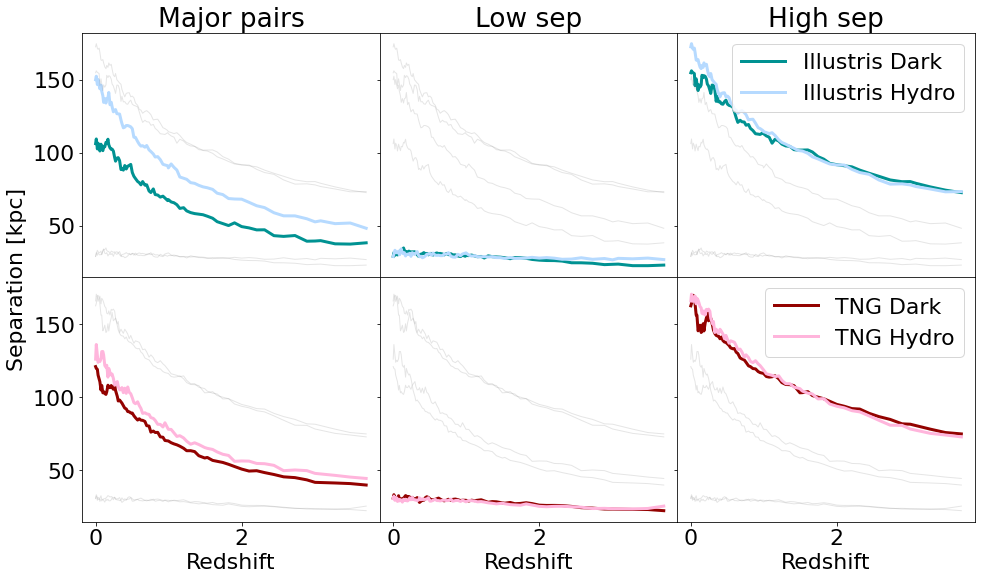

In [11]:
# want major pairs and low sep major pairs and high sep major pairs

fig,ax = plt.subplots(2,3,figsize=(16,9),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0)

# plot for Illustris dark vs. TNG dark and Hydro v hydro for dwarfs

simNames = ["Illustris", "TNG"]
keytoplot = "Median Separation"
keylabel = "Median separation [kpc]"
altsize = 1
altalpha = 0.2

# left top plot (major pairs in Illustris)
ax[0][0].set_title("Major pairs")
ax[0][0].plot(data_summary1['Illustris']["dark"]['Redshift'], data_summary1['Illustris']["dark"][keytoplot], label="Illustris Dark", color=palette['Illustris dark'], lw=3)
ax[0][0].plot(data_summary1['Illustris']["hydro"]['Redshift'], data_summary1['Illustris']["hydro"][keytoplot], label="Illustris Hydro", color=palette['Illustris hydro'], lw=3)
ax[0][0].plot(data_summary2['Illustris']["dark"]['Redshift'], data_summary2['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][0].plot(data_summary2['Illustris']["hydro"]['Redshift'], data_summary2['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][0].plot(data_summary3['Illustris']["dark"]['Redshift'], data_summary3['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][0].plot(data_summary3['Illustris']["hydro"]['Redshift'], data_summary3['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

# middle top plot (Low sep major pairs in illustris)
ax[0][1].set_title("Low sep")
ax[0][1].plot(data_summary2['Illustris']["dark"]['Redshift'], data_summary2['Illustris']["dark"][keytoplot], label="Illustris Dark", color=palette['Illustris dark'], lw=3)
ax[0][1].plot(data_summary2['Illustris']["hydro"]['Redshift'], data_summary2['Illustris']["hydro"][keytoplot], label="Illustris Hydro", color=palette['Illustris hydro'], lw=3)
ax[0][1].plot(data_summary3['Illustris']["dark"]['Redshift'], data_summary3['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][1].plot(data_summary3['Illustris']["hydro"]['Redshift'], data_summary3['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][1].plot(data_summary1['Illustris']["dark"]['Redshift'], data_summary1['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][1].plot(data_summary1['Illustris']["hydro"]['Redshift'], data_summary1['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

# # right top plot (High sep major pairs  in illustris)
ax[0][2].set_title("High sep")
ax[0][2].plot(data_summary3['Illustris']["dark"]['Redshift'], data_summary3['Illustris']["dark"][keytoplot], label="Illustris Dark", color=palette['Illustris dark'], lw=3)
ax[0][2].plot(data_summary3['Illustris']["hydro"]['Redshift'], data_summary3['Illustris']["hydro"][keytoplot], label="Illustris Hydro", color=palette['Illustris hydro'], lw=3)
ax[0][2].plot(data_summary2['Illustris']["dark"]['Redshift'], data_summary2['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][2].plot(data_summary2['Illustris']["hydro"]['Redshift'], data_summary2['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][2].plot(data_summary1['Illustris']["dark"]['Redshift'], data_summary1['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][2].plot(data_summary1['Illustris']["hydro"]['Redshift'], data_summary1['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)


# # left bottom plot (major pairs in tng)
ax[1][0].plot(data_summary1['TNG']["dark"]['Redshift'], data_summary1['TNG']["dark"][keytoplot], label="TNG Dark", color=palette['TNG dark'], lw=3)
ax[1][0].plot(data_summary1['TNG']["hydro"]['Redshift'], data_summary1['TNG']["hydro"][keytoplot], label="TNG Hydro", color=palette['TNG hydro'], lw=3)
ax[1][0].plot(data_summary2['TNG']["dark"]['Redshift'], data_summary2['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][0].plot(data_summary2['TNG']["hydro"]['Redshift'], data_summary2['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][0].plot(data_summary3['TNG']["dark"]['Redshift'], data_summary3['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][0].plot(data_summary3['TNG']["hydro"]['Redshift'], data_summary3['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

# # middle bottom plot (Low sep major pairs in TNG)
ax[1][1].plot(data_summary2['TNG']["dark"]['Redshift'], data_summary2['TNG']["dark"][keytoplot], label="TNG Dark", color=palette['TNG dark'], lw=3)
ax[1][1].plot(data_summary2['TNG']["hydro"]['Redshift'], data_summary2['TNG']["hydro"][keytoplot], label="TNG Hydro", color=palette['TNG hydro'], lw=3)
ax[1][1].plot(data_summary1['TNG']["dark"]['Redshift'], data_summary1['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][1].plot(data_summary1['TNG']["hydro"]['Redshift'], data_summary1['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][1].plot(data_summary3['TNG']["dark"]['Redshift'], data_summary3['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][1].plot(data_summary3['TNG']["hydro"]['Redshift'], data_summary3['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)


# # right bottom plot (High sep major pairs in TNG)
ax[1][2].plot(data_summary3['TNG']["dark"]['Redshift'], data_summary3['TNG']["dark"][keytoplot], label="TNG Dark", color=palette['TNG dark'], lw=3)
ax[1][2].plot(data_summary3['TNG']["hydro"]['Redshift'], data_summary3['TNG']["hydro"][keytoplot], label="TNG Hydro", color=palette['TNG hydro'], lw=3)
ax[1][2].plot(data_summary2['TNG']["dark"]['Redshift'], data_summary2['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][2].plot(data_summary2['TNG']["hydro"]['Redshift'], data_summary2['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][2].plot(data_summary1['TNG']["dark"]['Redshift'], data_summary1['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][2].plot(data_summary1['TNG']["hydro"]['Redshift'], data_summary1['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

for i in ax[1]:
    i.set_xlabel("Redshift")

ax[0][2].legend(loc="upper right")
ax[1][2].legend(loc="upper right")
# ax[0][0].set_ylabel(keylabel)
# ax[1][0].set_ylabel(keylabel)
# ax[1][0].set_ylabel("Separation")
# ax[1][1].set_ylabel("Separation")
fig.text(0.06, 0.5, 'Separation [kpc]', va='center', rotation='vertical')
plt.savefig(f"../plots/pairs_z0_newfields/{size}_lowsep_separations.pdf",bbox_inches='tight')
plt.show()
    

### Low and high sep - impact on velocities

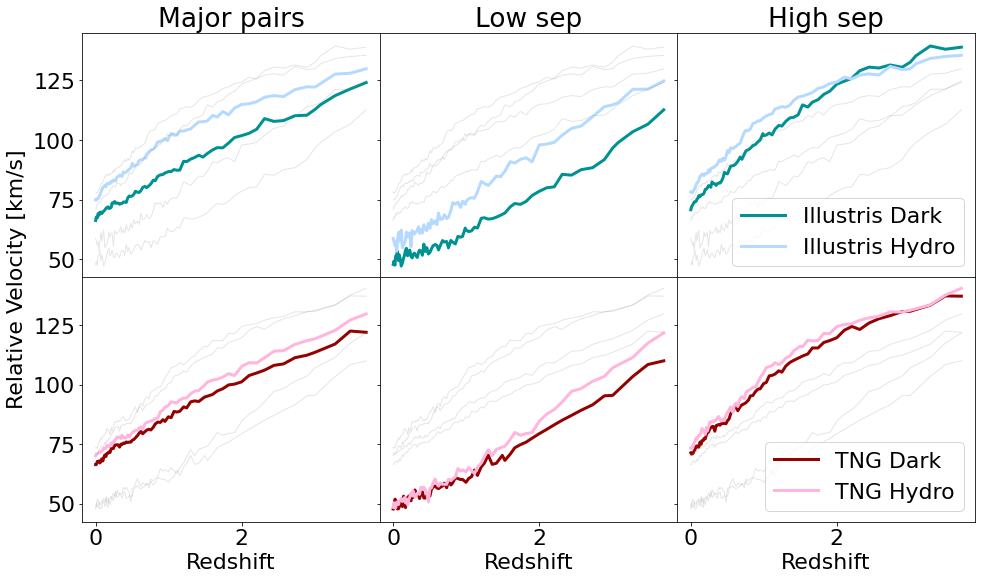

In [12]:
# want major pairs and low sep major pairs and high sep major pairs

fig,ax = plt.subplots(2,3,figsize=(16,9),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0)

# plot for Illustris dark vs. TNG dark and Hydro v hydro for dwarfs

simNames = ["Illustris", "TNG"]
keytoplot = "Median RelVel"
keylabel = "Median relative velocity [kpc]"
altsize = 1
altalpha = 0.2

# left top plot (major pairs in Illustris)
ax[0][0].set_title("Major pairs")
ax[0][0].plot(data_summary1['Illustris']["dark"]['Redshift'], data_summary1['Illustris']["dark"][keytoplot], label="Illustris Dark", color=palette['Illustris dark'], lw=3)
ax[0][0].plot(data_summary1['Illustris']["hydro"]['Redshift'], data_summary1['Illustris']["hydro"][keytoplot], label="Illustris Hydro", color=palette['Illustris hydro'], lw=3)
ax[0][0].plot(data_summary2['Illustris']["dark"]['Redshift'], data_summary2['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][0].plot(data_summary2['Illustris']["hydro"]['Redshift'], data_summary2['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][0].plot(data_summary3['Illustris']["dark"]['Redshift'], data_summary3['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][0].plot(data_summary3['Illustris']["hydro"]['Redshift'], data_summary3['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

# middle top plot (Low sep major pairs in illustris)
ax[0][1].set_title("Low sep")
ax[0][1].plot(data_summary2['Illustris']["dark"]['Redshift'], data_summary2['Illustris']["dark"][keytoplot], label="Illustris Dark", color=palette['Illustris dark'], lw=3)
ax[0][1].plot(data_summary2['Illustris']["hydro"]['Redshift'], data_summary2['Illustris']["hydro"][keytoplot], label="Illustris Hydro", color=palette['Illustris hydro'], lw=3)
ax[0][1].plot(data_summary3['Illustris']["dark"]['Redshift'], data_summary3['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][1].plot(data_summary3['Illustris']["hydro"]['Redshift'], data_summary3['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][1].plot(data_summary1['Illustris']["dark"]['Redshift'], data_summary1['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][1].plot(data_summary1['Illustris']["hydro"]['Redshift'], data_summary1['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

# # right top plot (High sep major pairs  in illustris)
ax[0][2].set_title("High sep")
ax[0][2].plot(data_summary3['Illustris']["dark"]['Redshift'], data_summary3['Illustris']["dark"][keytoplot], label="Illustris Dark", color=palette['Illustris dark'], lw=3)
ax[0][2].plot(data_summary3['Illustris']["hydro"]['Redshift'], data_summary3['Illustris']["hydro"][keytoplot], label="Illustris Hydro", color=palette['Illustris hydro'], lw=3)
ax[0][2].plot(data_summary2['Illustris']["dark"]['Redshift'], data_summary2['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][2].plot(data_summary2['Illustris']["hydro"]['Redshift'], data_summary2['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][2].plot(data_summary1['Illustris']["dark"]['Redshift'], data_summary1['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][2].plot(data_summary1['Illustris']["hydro"]['Redshift'], data_summary1['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)


# # left bottom plot (major pairs in tng)
ax[1][0].plot(data_summary1['TNG']["dark"]['Redshift'], data_summary1['TNG']["dark"][keytoplot], label="TNG Dark", color=palette['TNG dark'], lw=3)
ax[1][0].plot(data_summary1['TNG']["hydro"]['Redshift'], data_summary1['TNG']["hydro"][keytoplot], label="TNG Hydro", color=palette['TNG hydro'], lw=3)
ax[1][0].plot(data_summary2['TNG']["dark"]['Redshift'], data_summary2['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][0].plot(data_summary2['TNG']["hydro"]['Redshift'], data_summary2['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][0].plot(data_summary3['TNG']["dark"]['Redshift'], data_summary3['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][0].plot(data_summary3['TNG']["hydro"]['Redshift'], data_summary3['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

# # middle bottom plot (Low sep major pairs in TNG)
ax[1][1].plot(data_summary2['TNG']["dark"]['Redshift'], data_summary2['TNG']["dark"][keytoplot], label="TNG Dark", color=palette['TNG dark'], lw=3)
ax[1][1].plot(data_summary2['TNG']["hydro"]['Redshift'], data_summary2['TNG']["hydro"][keytoplot], label="TNG Hydro", color=palette['TNG hydro'], lw=3)
ax[1][1].plot(data_summary1['TNG']["dark"]['Redshift'], data_summary1['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][1].plot(data_summary1['TNG']["hydro"]['Redshift'], data_summary1['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][1].plot(data_summary3['TNG']["dark"]['Redshift'], data_summary3['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][1].plot(data_summary3['TNG']["hydro"]['Redshift'], data_summary3['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)


# # right bottom plot (High sep major pairs in TNG)
ax[1][2].plot(data_summary3['TNG']["dark"]['Redshift'], data_summary3['TNG']["dark"][keytoplot], label="TNG Dark", color=palette['TNG dark'], lw=3)
ax[1][2].plot(data_summary3['TNG']["hydro"]['Redshift'], data_summary3['TNG']["hydro"][keytoplot], label="TNG Hydro", color=palette['TNG hydro'], lw=3)
ax[1][2].plot(data_summary2['TNG']["dark"]['Redshift'], data_summary2['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][2].plot(data_summary2['TNG']["hydro"]['Redshift'], data_summary2['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][2].plot(data_summary1['TNG']["dark"]['Redshift'], data_summary1['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][2].plot(data_summary1['TNG']["hydro"]['Redshift'], data_summary1['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

for i in ax[1]:
    i.set_xlabel("Redshift")

ax[0][2].legend(loc="lower right")
ax[1][2].legend(loc="lower right")
# ax[0][0].set_ylabel(keylabel)
# ax[1][0].set_ylabel(keylabel)
# ax[1][0].set_ylabel("Separation")
# ax[1][1].set_ylabel("Separation")
# fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(0.06, 0.5, 'Relative Velocity [km/s]', va='center', rotation='vertical')
plt.savefig(f"../plots/pairs_z0_newfields/{size}_lowsep_velocities.pdf",bbox_inches='tight')
plt.show()
    

### low and high sep - impact on pair ratios

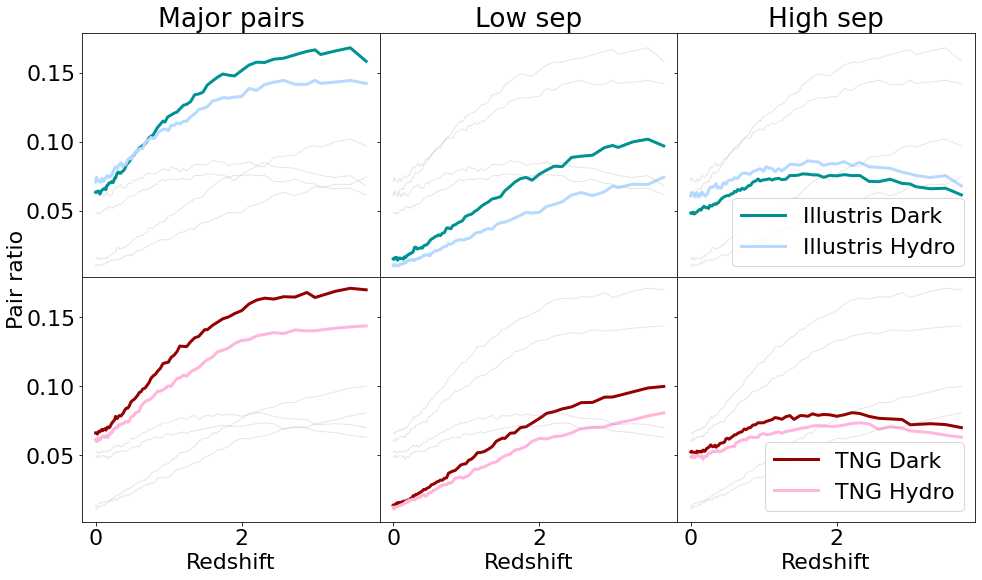

In [12]:
# want major pairs and low sep major pairs and high sep major pairs

fig,ax = plt.subplots(2,3,figsize=(16,9),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0)

# plot for Illustris dark vs. TNG dark and Hydro v hydro for dwarfs

simNames = ["Illustris", "TNG"]
keytoplot = "Ratio pairs"
# keylabel = "Median relative velocity [kpc]"
altsize = 1
altalpha = 0.2

# left top plot (major pairs in Illustris)
ax[0][0].set_title("Major pairs")
ax[0][0].plot(data_summary1['Illustris']["dark"]['Redshift'], data_summary1['Illustris']["dark"][keytoplot], label="Illustris Dark", color=palette['Illustris dark'], lw=3)
ax[0][0].plot(data_summary1['Illustris']["hydro"]['Redshift'], data_summary1['Illustris']["hydro"][keytoplot], label="Illustris Hydro", color=palette['Illustris hydro'], lw=3)
ax[0][0].plot(data_summary2['Illustris']["dark"]['Redshift'], data_summary2['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][0].plot(data_summary2['Illustris']["hydro"]['Redshift'], data_summary2['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][0].plot(data_summary3['Illustris']["dark"]['Redshift'], data_summary3['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][0].plot(data_summary3['Illustris']["hydro"]['Redshift'], data_summary3['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

# middle top plot (Low sep major pairs in illustris)
ax[0][1].set_title("Low sep")
ax[0][1].plot(data_summary2['Illustris']["dark"]['Redshift'], data_summary2['Illustris']["dark"][keytoplot], label="Illustris Dark", color=palette['Illustris dark'], lw=3)
ax[0][1].plot(data_summary2['Illustris']["hydro"]['Redshift'], data_summary2['Illustris']["hydro"][keytoplot], label="Illustris Hydro", color=palette['Illustris hydro'], lw=3)
ax[0][1].plot(data_summary3['Illustris']["dark"]['Redshift'], data_summary3['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][1].plot(data_summary3['Illustris']["hydro"]['Redshift'], data_summary3['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][1].plot(data_summary1['Illustris']["dark"]['Redshift'], data_summary1['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][1].plot(data_summary1['Illustris']["hydro"]['Redshift'], data_summary1['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

# # right top plot (High sep major pairs  in illustris)
ax[0][2].set_title("High sep")
ax[0][2].plot(data_summary3['Illustris']["dark"]['Redshift'], data_summary3['Illustris']["dark"][keytoplot], label="Illustris Dark", color=palette['Illustris dark'], lw=3)
ax[0][2].plot(data_summary3['Illustris']["hydro"]['Redshift'], data_summary3['Illustris']["hydro"][keytoplot], label="Illustris Hydro", color=palette['Illustris hydro'], lw=3)
ax[0][2].plot(data_summary2['Illustris']["dark"]['Redshift'], data_summary2['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][2].plot(data_summary2['Illustris']["hydro"]['Redshift'], data_summary2['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][2].plot(data_summary1['Illustris']["dark"]['Redshift'], data_summary1['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][2].plot(data_summary1['Illustris']["hydro"]['Redshift'], data_summary1['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)


# # left bottom plot (major pairs in tng)
ax[1][0].plot(data_summary1['TNG']["dark"]['Redshift'], data_summary1['TNG']["dark"][keytoplot], label="TNG Dark", color=palette['TNG dark'], lw=3)
ax[1][0].plot(data_summary1['TNG']["hydro"]['Redshift'], data_summary1['TNG']["hydro"][keytoplot], label="TNG Hydro", color=palette['TNG hydro'], lw=3)
ax[1][0].plot(data_summary2['TNG']["dark"]['Redshift'], data_summary2['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][0].plot(data_summary2['TNG']["hydro"]['Redshift'], data_summary2['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][0].plot(data_summary3['TNG']["dark"]['Redshift'], data_summary3['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][0].plot(data_summary3['TNG']["hydro"]['Redshift'], data_summary3['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

# # middle bottom plot (Low sep major pairs in TNG)
ax[1][1].plot(data_summary2['TNG']["dark"]['Redshift'], data_summary2['TNG']["dark"][keytoplot], label="TNG Dark", color=palette['TNG dark'], lw=3)
ax[1][1].plot(data_summary2['TNG']["hydro"]['Redshift'], data_summary2['TNG']["hydro"][keytoplot], label="TNG Hydro", color=palette['TNG hydro'], lw=3)
ax[1][1].plot(data_summary1['TNG']["dark"]['Redshift'], data_summary1['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][1].plot(data_summary1['TNG']["hydro"]['Redshift'], data_summary1['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][1].plot(data_summary3['TNG']["dark"]['Redshift'], data_summary3['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][1].plot(data_summary3['TNG']["hydro"]['Redshift'], data_summary3['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)


# # right bottom plot (High sep major pairs in TNG)
ax[1][2].plot(data_summary3['TNG']["dark"]['Redshift'], data_summary3['TNG']["dark"][keytoplot], label="TNG Dark", color=palette['TNG dark'], lw=3)
ax[1][2].plot(data_summary3['TNG']["hydro"]['Redshift'], data_summary3['TNG']["hydro"][keytoplot], label="TNG Hydro", color=palette['TNG hydro'], lw=3)
ax[1][2].plot(data_summary2['TNG']["dark"]['Redshift'], data_summary2['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][2].plot(data_summary2['TNG']["hydro"]['Redshift'], data_summary2['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][2].plot(data_summary1['TNG']["dark"]['Redshift'], data_summary1['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][2].plot(data_summary1['TNG']["hydro"]['Redshift'], data_summary1['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

for i in ax[1]:
    i.set_xlabel("Redshift")

ax[0][2].legend(loc="lower right")
ax[1][2].legend(loc="lower right")
# ax[0][0].set_ylabel(keylabel)
# ax[1][0].set_ylabel(keylabel)
# ax[1][0].set_ylabel("Separation")
# ax[1][1].set_ylabel("Separation")
# fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(0.06, 0.5, 'Pair ratio', va='center', rotation='vertical')
plt.savefig(f"../plots/pairs_z0_newfields/{size}_lowsep_ratiopairs.pdf",bbox_inches='tight')
plt.show()
    

# Low and high velocities

In [13]:
subset2 = "lowvelmajor"
subset3 = "highvelmajor"
        
data_summary2 = {}
for it_sim in ["Illustris","TNG"]:
    data_summary2[it_sim] = {}
    
    for it_phys in ["dark","hydro"]:
        inst = compile_summary(sim=it_sim, phys=it_phys, size=size, subset=subset2, redshift_cutoff=3.9)
        data_summary2[it_sim][it_phys] = inst.get_data()
        
        print(f"done with {it_sim} {it_phys}")
        
data_summary3 = {}
for it_sim in ["Illustris","TNG"]:
    data_summary3[it_sim] = {}
    
    for it_phys in ["dark","hydro"]:
        inst = compile_summary(sim=it_sim, phys=it_phys, size=size, subset=subset3, redshift_cutoff=3.9)
        data_summary3[it_sim][it_phys] = inst.get_data()
        
        print(f"done with {it_sim} {it_phys}")

0 does not exist -- skipping
1 does not exist -- skipping
2 does not exist -- skipping
3 does not exist -- skipping
4 does not exist -- skipping
5 does not exist -- skipping
6 does not exist -- skipping
7 does not exist -- skipping
8 does not exist -- skipping
9 does not exist -- skipping
10 does not exist -- skipping
11 does not exist -- skipping
12 does not exist -- skipping
13 does not exist -- skipping
14 does not exist -- skipping
54 does not exist -- skipping
done with Illustris dark
0 does not exist -- skipping
1 does not exist -- skipping
2 does not exist -- skipping
3 does not exist -- skipping
4 does not exist -- skipping
5 does not exist -- skipping
6 does not exist -- skipping
7 does not exist -- skipping
8 does not exist -- skipping
9 does not exist -- skipping
10 does not exist -- skipping
11 does not exist -- skipping
12 does not exist -- skipping
13 does not exist -- skipping
14 does not exist -- skipping
54 does not exist -- skipping
113 does not exist -- skipping
done

### Low and high velocity - impact on separations

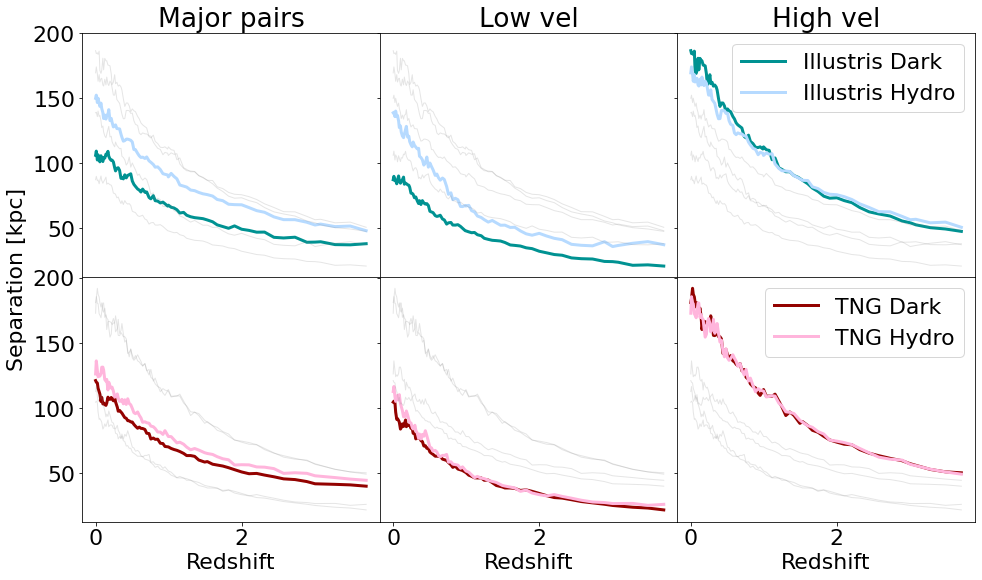

In [14]:
# want major pairs and low sep major pairs and high sep major pairs

fig,ax = plt.subplots(2,3,figsize=(16,9),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0)

# plot for Illustris dark vs. TNG dark and Hydro v hydro for dwarfs

simNames = ["Illustris", "TNG"]
keytoplot = "Median Separation"
keylabel = "Median separation [kpc]"
altsize = 1
altalpha = 0.2

# left top plot (major pairs in Illustris)
ax[0][0].set_title("Major pairs")
ax[0][0].plot(data_summary1['Illustris']["dark"]['Redshift'], data_summary1['Illustris']["dark"][keytoplot], label="Illustris Dark", color=palette['Illustris dark'], lw=3)
ax[0][0].plot(data_summary1['Illustris']["hydro"]['Redshift'], data_summary1['Illustris']["hydro"][keytoplot], label="Illustris Hydro", color=palette['Illustris hydro'], lw=3)
ax[0][0].plot(data_summary2['Illustris']["dark"]['Redshift'], data_summary2['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][0].plot(data_summary2['Illustris']["hydro"]['Redshift'], data_summary2['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][0].plot(data_summary3['Illustris']["dark"]['Redshift'], data_summary3['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][0].plot(data_summary3['Illustris']["hydro"]['Redshift'], data_summary3['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

# middle top plot (Low sep major pairs in illustris)
ax[0][1].set_title("Low vel")
ax[0][1].plot(data_summary2['Illustris']["dark"]['Redshift'], data_summary2['Illustris']["dark"][keytoplot], label="Illustris Dark", color=palette['Illustris dark'], lw=3)
ax[0][1].plot(data_summary2['Illustris']["hydro"]['Redshift'], data_summary2['Illustris']["hydro"][keytoplot], label="Illustris Hydro", color=palette['Illustris hydro'], lw=3)
ax[0][1].plot(data_summary3['Illustris']["dark"]['Redshift'], data_summary3['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][1].plot(data_summary3['Illustris']["hydro"]['Redshift'], data_summary3['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][1].plot(data_summary1['Illustris']["dark"]['Redshift'], data_summary1['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][1].plot(data_summary1['Illustris']["hydro"]['Redshift'], data_summary1['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

# # right top plot (High sep major pairs  in illustris)
ax[0][2].set_title("High vel")
ax[0][2].plot(data_summary3['Illustris']["dark"]['Redshift'], data_summary3['Illustris']["dark"][keytoplot], label="Illustris Dark", color=palette['Illustris dark'], lw=3)
ax[0][2].plot(data_summary3['Illustris']["hydro"]['Redshift'], data_summary3['Illustris']["hydro"][keytoplot], label="Illustris Hydro", color=palette['Illustris hydro'], lw=3)
ax[0][2].plot(data_summary2['Illustris']["dark"]['Redshift'], data_summary2['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][2].plot(data_summary2['Illustris']["hydro"]['Redshift'], data_summary2['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][2].plot(data_summary1['Illustris']["dark"]['Redshift'], data_summary1['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][2].plot(data_summary1['Illustris']["hydro"]['Redshift'], data_summary1['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)


# # left bottom plot (major pairs in tng)
ax[1][0].plot(data_summary1['TNG']["dark"]['Redshift'], data_summary1['TNG']["dark"][keytoplot], label="TNG Dark", color=palette['TNG dark'], lw=3)
ax[1][0].plot(data_summary1['TNG']["hydro"]['Redshift'], data_summary1['TNG']["hydro"][keytoplot], label="TNG Hydro", color=palette['TNG hydro'], lw=3)
ax[1][0].plot(data_summary2['TNG']["dark"]['Redshift'], data_summary2['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][0].plot(data_summary2['TNG']["hydro"]['Redshift'], data_summary2['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][0].plot(data_summary3['TNG']["dark"]['Redshift'], data_summary3['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][0].plot(data_summary3['TNG']["hydro"]['Redshift'], data_summary3['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

# # middle bottom plot (Low sep major pairs in TNG)
ax[1][1].plot(data_summary2['TNG']["dark"]['Redshift'], data_summary2['TNG']["dark"][keytoplot], label="TNG Dark", color=palette['TNG dark'], lw=3)
ax[1][1].plot(data_summary2['TNG']["hydro"]['Redshift'], data_summary2['TNG']["hydro"][keytoplot], label="TNG Hydro", color=palette['TNG hydro'], lw=3)
ax[1][1].plot(data_summary1['TNG']["dark"]['Redshift'], data_summary1['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][1].plot(data_summary1['TNG']["hydro"]['Redshift'], data_summary1['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][1].plot(data_summary3['TNG']["dark"]['Redshift'], data_summary3['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][1].plot(data_summary3['TNG']["hydro"]['Redshift'], data_summary3['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)


# # right bottom plot (High sep major pairs in TNG)
ax[1][2].plot(data_summary3['TNG']["dark"]['Redshift'], data_summary3['TNG']["dark"][keytoplot], label="TNG Dark", color=palette['TNG dark'], lw=3)
ax[1][2].plot(data_summary3['TNG']["hydro"]['Redshift'], data_summary3['TNG']["hydro"][keytoplot], label="TNG Hydro", color=palette['TNG hydro'], lw=3)
ax[1][2].plot(data_summary2['TNG']["dark"]['Redshift'], data_summary2['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][2].plot(data_summary2['TNG']["hydro"]['Redshift'], data_summary2['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][2].plot(data_summary1['TNG']["dark"]['Redshift'], data_summary1['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][2].plot(data_summary1['TNG']["hydro"]['Redshift'], data_summary1['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

for i in ax[1]:
    i.set_xlabel("Redshift")

ax[0][2].legend(loc="upper right")
ax[1][2].legend(loc="upper right")
# ax[0][0].set_ylabel(keylabel)
# ax[1][0].set_ylabel(keylabel)
# ax[1][0].set_ylabel("Separation")
# ax[1][1].set_ylabel("Separation")
# fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(0.06, 0.5, 'Separation [kpc]', va='center', rotation='vertical')
plt.savefig(f"../plots/pairs_z0_newfields/{size}_lowvel_separations.pdf",bbox_inches='tight')
plt.show()
    

### low and high velocities - impact on velocities

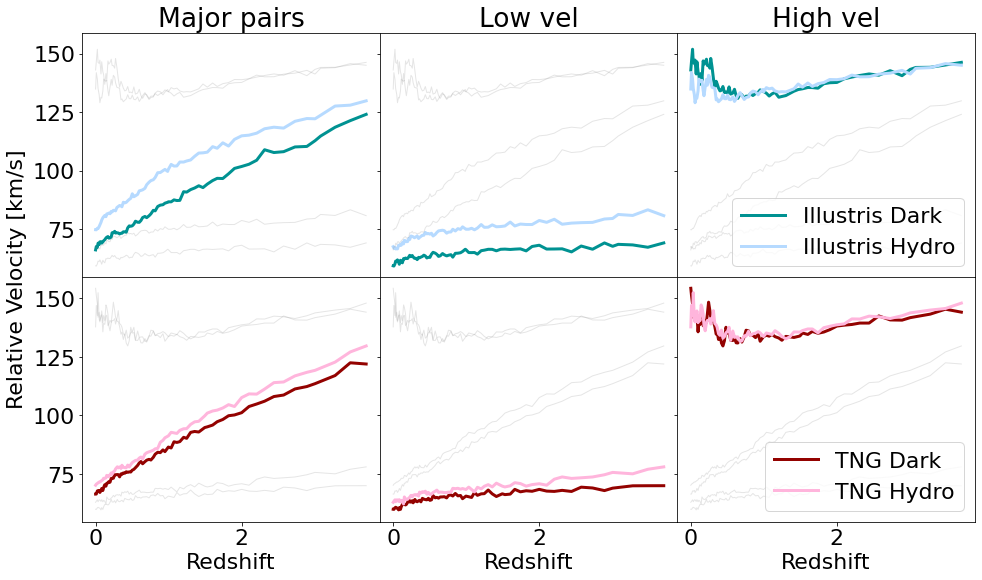

In [15]:
# want major pairs and low sep major pairs and high sep major pairs

fig,ax = plt.subplots(2,3,figsize=(16,9),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0)

# plot for Illustris dark vs. TNG dark and Hydro v hydro for dwarfs

simNames = ["Illustris", "TNG"]
keytoplot = "Median RelVel"
keylabel = "Median relative velocity [kpc]"
altsize = 1
altalpha = 0.2

# left top plot (major pairs in Illustris)
ax[0][0].set_title("Major pairs")
ax[0][0].plot(data_summary1['Illustris']["dark"]['Redshift'], data_summary1['Illustris']["dark"][keytoplot], label="Illustris Dark", color=palette['Illustris dark'], lw=3)
ax[0][0].plot(data_summary1['Illustris']["hydro"]['Redshift'], data_summary1['Illustris']["hydro"][keytoplot], label="Illustris Hydro", color=palette['Illustris hydro'], lw=3)
ax[0][0].plot(data_summary2['Illustris']["dark"]['Redshift'], data_summary2['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][0].plot(data_summary2['Illustris']["hydro"]['Redshift'], data_summary2['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][0].plot(data_summary3['Illustris']["dark"]['Redshift'], data_summary3['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][0].plot(data_summary3['Illustris']["hydro"]['Redshift'], data_summary3['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

# middle top plot (Low sep major pairs in illustris)
ax[0][1].set_title("Low vel")
ax[0][1].plot(data_summary2['Illustris']["dark"]['Redshift'], data_summary2['Illustris']["dark"][keytoplot], label="Illustris Dark", color=palette['Illustris dark'], lw=3)
ax[0][1].plot(data_summary2['Illustris']["hydro"]['Redshift'], data_summary2['Illustris']["hydro"][keytoplot], label="Illustris Hydro", color=palette['Illustris hydro'], lw=3)
ax[0][1].plot(data_summary3['Illustris']["dark"]['Redshift'], data_summary3['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][1].plot(data_summary3['Illustris']["hydro"]['Redshift'], data_summary3['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][1].plot(data_summary1['Illustris']["dark"]['Redshift'], data_summary1['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][1].plot(data_summary1['Illustris']["hydro"]['Redshift'], data_summary1['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

# # right top plot (High sep major pairs  in illustris)
ax[0][2].set_title("High vel")
ax[0][2].plot(data_summary3['Illustris']["dark"]['Redshift'], data_summary3['Illustris']["dark"][keytoplot], label="Illustris Dark", color=palette['Illustris dark'], lw=3)
ax[0][2].plot(data_summary3['Illustris']["hydro"]['Redshift'], data_summary3['Illustris']["hydro"][keytoplot], label="Illustris Hydro", color=palette['Illustris hydro'], lw=3)
ax[0][2].plot(data_summary2['Illustris']["dark"]['Redshift'], data_summary2['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][2].plot(data_summary2['Illustris']["hydro"]['Redshift'], data_summary2['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][2].plot(data_summary1['Illustris']["dark"]['Redshift'], data_summary1['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][2].plot(data_summary1['Illustris']["hydro"]['Redshift'], data_summary1['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)


# # left bottom plot (major pairs in tng)
ax[1][0].plot(data_summary1['TNG']["dark"]['Redshift'], data_summary1['TNG']["dark"][keytoplot], label="TNG Dark", color=palette['TNG dark'], lw=3)
ax[1][0].plot(data_summary1['TNG']["hydro"]['Redshift'], data_summary1['TNG']["hydro"][keytoplot], label="TNG Hydro", color=palette['TNG hydro'], lw=3)
ax[1][0].plot(data_summary2['TNG']["dark"]['Redshift'], data_summary2['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][0].plot(data_summary2['TNG']["hydro"]['Redshift'], data_summary2['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][0].plot(data_summary3['TNG']["dark"]['Redshift'], data_summary3['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][0].plot(data_summary3['TNG']["hydro"]['Redshift'], data_summary3['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

# # middle bottom plot (Low sep major pairs in TNG)
ax[1][1].plot(data_summary2['TNG']["dark"]['Redshift'], data_summary2['TNG']["dark"][keytoplot], label="TNG Dark", color=palette['TNG dark'], lw=3)
ax[1][1].plot(data_summary2['TNG']["hydro"]['Redshift'], data_summary2['TNG']["hydro"][keytoplot], label="TNG Hydro", color=palette['TNG hydro'], lw=3)
ax[1][1].plot(data_summary1['TNG']["dark"]['Redshift'], data_summary1['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][1].plot(data_summary1['TNG']["hydro"]['Redshift'], data_summary1['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][1].plot(data_summary3['TNG']["dark"]['Redshift'], data_summary3['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][1].plot(data_summary3['TNG']["hydro"]['Redshift'], data_summary3['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)


# # right bottom plot (High sep major pairs in TNG)
ax[1][2].plot(data_summary3['TNG']["dark"]['Redshift'], data_summary3['TNG']["dark"][keytoplot], label="TNG Dark", color=palette['TNG dark'], lw=3)
ax[1][2].plot(data_summary3['TNG']["hydro"]['Redshift'], data_summary3['TNG']["hydro"][keytoplot], label="TNG Hydro", color=palette['TNG hydro'], lw=3)
ax[1][2].plot(data_summary2['TNG']["dark"]['Redshift'], data_summary2['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][2].plot(data_summary2['TNG']["hydro"]['Redshift'], data_summary2['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][2].plot(data_summary1['TNG']["dark"]['Redshift'], data_summary1['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][2].plot(data_summary1['TNG']["hydro"]['Redshift'], data_summary1['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

for i in ax[1]:
    i.set_xlabel("Redshift")

ax[0][2].legend(loc="lower right")
ax[1][2].legend(loc="lower right")
# ax[0][0].set_ylabel(keylabel)
# ax[1][0].set_ylabel(keylabel)
# ax[1][0].set_ylabel("Separation")
# ax[1][1].set_ylabel("Separation")
# fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(0.06, 0.5, 'Relative Velocity [km/s]', va='center', rotation='vertical')
plt.savefig(f"../plots/pairs_z0_newfields/{size}_lowvel_velocities.pdf",bbox_inches='tight')
plt.show()
    

### low and high vel - impact on pair ratios

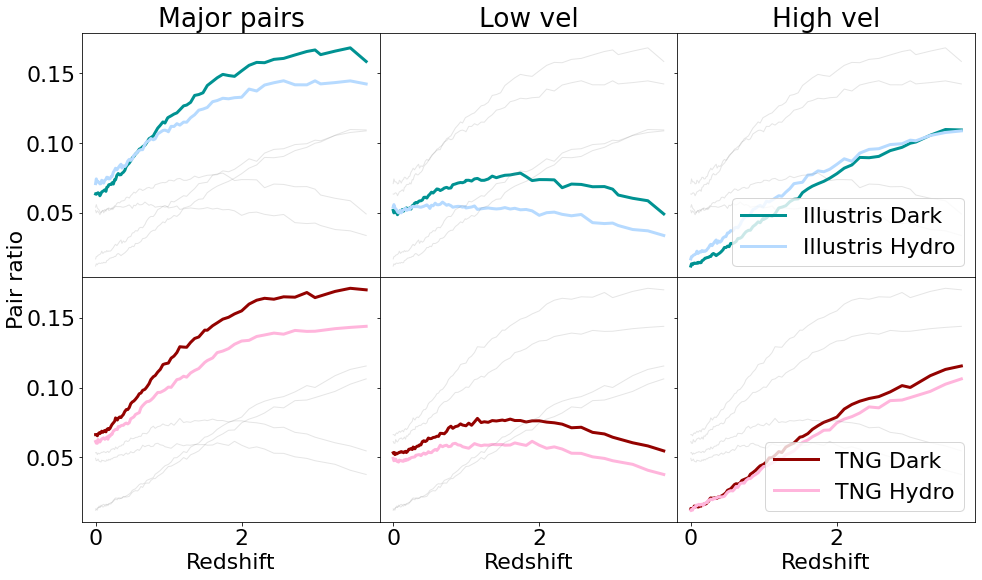

In [14]:
# want major pairs and low sep major pairs and high sep major pairs

fig,ax = plt.subplots(2,3,figsize=(16,9),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0)

# plot for Illustris dark vs. TNG dark and Hydro v hydro for dwarfs

simNames = ["Illustris", "TNG"]
keytoplot = "Ratio pairs"
keylabel = "Median relative velocity [kpc]"
altsize = 1
altalpha = 0.2

# left top plot (major pairs in Illustris)
ax[0][0].set_title("Major pairs")
ax[0][0].plot(data_summary1['Illustris']["dark"]['Redshift'], data_summary1['Illustris']["dark"][keytoplot], label="Illustris Dark", color=palette['Illustris dark'], lw=3)
ax[0][0].plot(data_summary1['Illustris']["hydro"]['Redshift'], data_summary1['Illustris']["hydro"][keytoplot], label="Illustris Hydro", color=palette['Illustris hydro'], lw=3)
ax[0][0].plot(data_summary2['Illustris']["dark"]['Redshift'], data_summary2['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][0].plot(data_summary2['Illustris']["hydro"]['Redshift'], data_summary2['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][0].plot(data_summary3['Illustris']["dark"]['Redshift'], data_summary3['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][0].plot(data_summary3['Illustris']["hydro"]['Redshift'], data_summary3['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

# middle top plot (Low sep major pairs in illustris)
ax[0][1].set_title("Low vel")
ax[0][1].plot(data_summary2['Illustris']["dark"]['Redshift'], data_summary2['Illustris']["dark"][keytoplot], label="Illustris Dark", color=palette['Illustris dark'], lw=3)
ax[0][1].plot(data_summary2['Illustris']["hydro"]['Redshift'], data_summary2['Illustris']["hydro"][keytoplot], label="Illustris Hydro", color=palette['Illustris hydro'], lw=3)
ax[0][1].plot(data_summary3['Illustris']["dark"]['Redshift'], data_summary3['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][1].plot(data_summary3['Illustris']["hydro"]['Redshift'], data_summary3['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][1].plot(data_summary1['Illustris']["dark"]['Redshift'], data_summary1['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][1].plot(data_summary1['Illustris']["hydro"]['Redshift'], data_summary1['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

# # right top plot (High sep major pairs  in illustris)
ax[0][2].set_title("High vel")
ax[0][2].plot(data_summary3['Illustris']["dark"]['Redshift'], data_summary3['Illustris']["dark"][keytoplot], label="Illustris Dark", color=palette['Illustris dark'], lw=3)
ax[0][2].plot(data_summary3['Illustris']["hydro"]['Redshift'], data_summary3['Illustris']["hydro"][keytoplot], label="Illustris Hydro", color=palette['Illustris hydro'], lw=3)
ax[0][2].plot(data_summary2['Illustris']["dark"]['Redshift'], data_summary2['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][2].plot(data_summary2['Illustris']["hydro"]['Redshift'], data_summary2['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][2].plot(data_summary1['Illustris']["dark"]['Redshift'], data_summary1['Illustris']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[0][2].plot(data_summary1['Illustris']["hydro"]['Redshift'], data_summary1['Illustris']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)


# # left bottom plot (major pairs in tng)
ax[1][0].plot(data_summary1['TNG']["dark"]['Redshift'], data_summary1['TNG']["dark"][keytoplot], label="TNG Dark", color=palette['TNG dark'], lw=3)
ax[1][0].plot(data_summary1['TNG']["hydro"]['Redshift'], data_summary1['TNG']["hydro"][keytoplot], label="TNG Hydro", color=palette['TNG hydro'], lw=3)
ax[1][0].plot(data_summary2['TNG']["dark"]['Redshift'], data_summary2['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][0].plot(data_summary2['TNG']["hydro"]['Redshift'], data_summary2['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][0].plot(data_summary3['TNG']["dark"]['Redshift'], data_summary3['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][0].plot(data_summary3['TNG']["hydro"]['Redshift'], data_summary3['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

# # middle bottom plot (Low sep major pairs in TNG)
ax[1][1].plot(data_summary2['TNG']["dark"]['Redshift'], data_summary2['TNG']["dark"][keytoplot], label="TNG Dark", color=palette['TNG dark'], lw=3)
ax[1][1].plot(data_summary2['TNG']["hydro"]['Redshift'], data_summary2['TNG']["hydro"][keytoplot], label="TNG Hydro", color=palette['TNG hydro'], lw=3)
ax[1][1].plot(data_summary1['TNG']["dark"]['Redshift'], data_summary1['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][1].plot(data_summary1['TNG']["hydro"]['Redshift'], data_summary1['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][1].plot(data_summary3['TNG']["dark"]['Redshift'], data_summary3['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][1].plot(data_summary3['TNG']["hydro"]['Redshift'], data_summary3['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)


# # right bottom plot (High sep major pairs in TNG)
ax[1][2].plot(data_summary3['TNG']["dark"]['Redshift'], data_summary3['TNG']["dark"][keytoplot], label="TNG Dark", color=palette['TNG dark'], lw=3)
ax[1][2].plot(data_summary3['TNG']["hydro"]['Redshift'], data_summary3['TNG']["hydro"][keytoplot], label="TNG Hydro", color=palette['TNG hydro'], lw=3)
ax[1][2].plot(data_summary2['TNG']["dark"]['Redshift'], data_summary2['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][2].plot(data_summary2['TNG']["hydro"]['Redshift'], data_summary2['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][2].plot(data_summary1['TNG']["dark"]['Redshift'], data_summary1['TNG']['dark'][keytoplot], color="grey",alpha=altalpha,lw=altsize)
ax[1][2].plot(data_summary1['TNG']["hydro"]['Redshift'], data_summary1['TNG']["hydro"][keytoplot], color="grey",alpha=altalpha,lw=altsize)

for i in ax[1]:
    i.set_xlabel("Redshift")

ax[0][2].legend(loc="lower right")
ax[1][2].legend(loc="lower right")
# ax[0][0].set_ylabel(keylabel)
# ax[1][0].set_ylabel(keylabel)
# ax[1][0].set_ylabel("Separation")
# ax[1][1].set_ylabel("Separation")
# fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(0.06, 0.5, 'Pair ratio', va='center', rotation='vertical')
plt.savefig(f"../plots/pairs_z0_newfields/{size}_lowvel_ratiopairs.pdf",bbox_inches='tight')
plt.show()
    

___
# graveyard
___

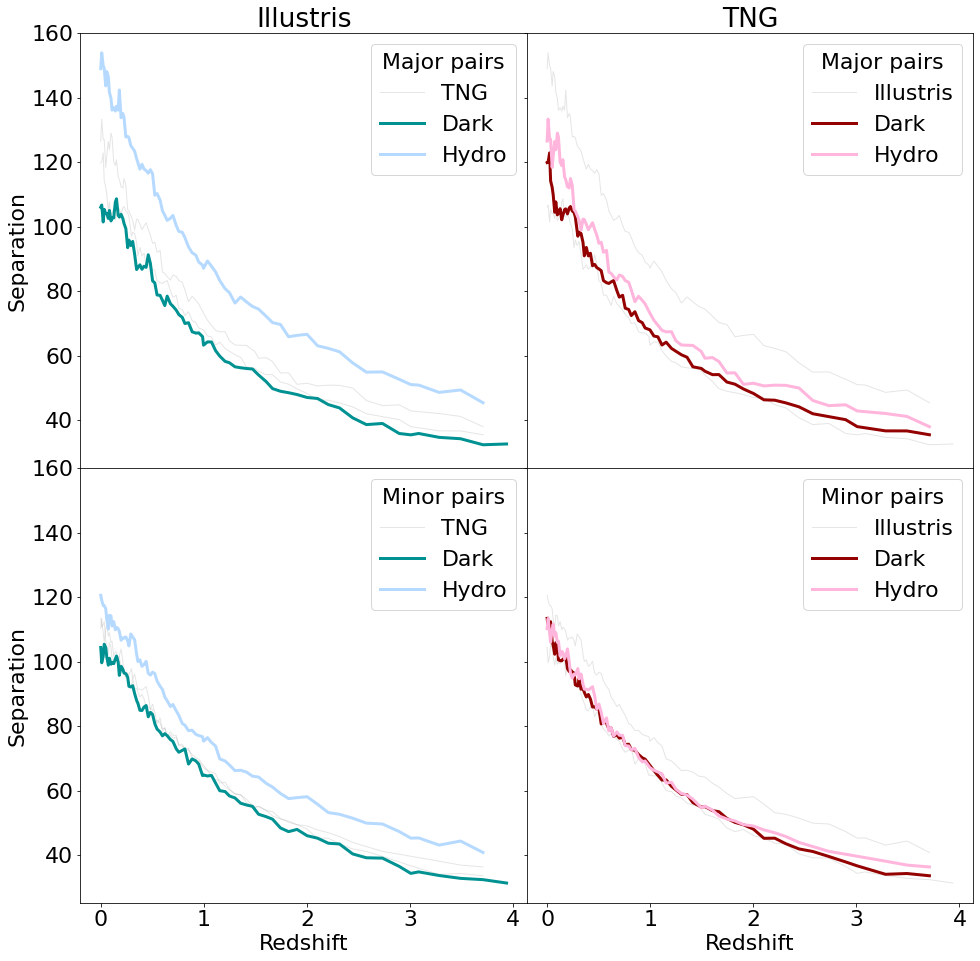

In [8]:
fig,ax = plt.subplots(2,2,figsize=(16,16),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0)

# plot for Illustris dark vs. TNG dark and Hydro v hydro for dwarfs

simNames = ["Illustris", "TNG"]
altsize = 1
altalpha = 0.2

# left plot (Illustris)
ax[0][0].set_title("Illustris")
ax[0][0].plot(data_summary['TNG']["dark"]['Redshift'], data_summary['TNG']['dark']['Median Separation'], color='grey',alpha=altalpha,lw=altsize)
ax[0][0].plot(data_summary['TNG']["hydro"]['Redshift'], data_summary['TNG']["hydro"]['Median Separation'], label="TNG", color='grey',alpha=altalpha,lw=altsize)
ax[0][0].plot(data_summary['Illustris']["dark"]['Redshift'], data_summary['Illustris']["dark"]['Median Separation'], label="Dark", color=palette['Illustris dark'], lw=3)
ax[0][0].plot(data_summary['Illustris']["hydro"]['Redshift'], data_summary['Illustris']["hydro"]['Median Separation'], label="Hydro", color=palette['Illustris hydro'], lw=3)

ax[0][1].set_title("TNG")
ax[0][1].plot(data_summary['Illustris']["dark"]['Redshift'], data_summary['Illustris']["dark"]['Median Separation'], color='grey',alpha=altalpha,lw=altsize)
ax[0][1].plot(data_summary['Illustris']["hydro"]['Redshift'], data_summary['Illustris']["hydro"]['Median Separation'], label="Illustris", color='grey',alpha=altalpha,lw=altsize)
ax[0][1].plot(data_summary['TNG']["dark"]['Redshift'], data_summary['TNG']["dark"]['Median Separation'], label="Dark", color=palette['TNG dark'], lw=3)
ax[0][1].plot(data_summary['TNG']["hydro"]['Redshift'], data_summary['TNG']["hydro"]['Median Separation'], label="Hydro", color=palette['TNG hydro'], lw=3)


ax[1][0].plot(data_summary_minor['TNG']["dark"]['Redshift'], data_summary_minor['TNG']['dark']['Median Separation'], color='grey',alpha=altalpha,lw=altsize)
ax[1][0].plot(data_summary_minor['TNG']["hydro"]['Redshift'], data_summary_minor['TNG']["hydro"]['Median Separation'], label="TNG", color='grey',alpha=altalpha,lw=altsize)
ax[1][0].plot(data_summary_minor['Illustris']["dark"]['Redshift'], data_summary_minor['Illustris']["dark"]['Median Separation'], label="Dark", color=palette['Illustris dark'], lw=3)
ax[1][0].plot(data_summary_minor['Illustris']["hydro"]['Redshift'], data_summary_minor['Illustris']["hydro"]['Median Separation'], label="Hydro", color=palette['Illustris hydro'], lw=3)

ax[1][1].plot(data_summary_minor['Illustris']["dark"]['Redshift'], data_summary_minor['Illustris']["dark"]['Median Separation'], color='grey',alpha=altalpha,lw=altsize)
ax[1][1].plot(data_summary_minor['Illustris']["hydro"]['Redshift'], data_summary_minor['Illustris']["hydro"]['Median Separation'], label="Illustris", color='grey',alpha=altalpha,lw=altsize)
ax[1][1].plot(data_summary_minor['TNG']["dark"]['Redshift'], data_summary_minor['TNG']["dark"]['Median Separation'], label="Dark", color=palette['TNG dark'], lw=3)
ax[1][1].plot(data_summary_minor['TNG']["hydro"]['Redshift'], data_summary_minor['TNG']["hydro"]['Median Separation'], label="Hydro", color=palette['TNG hydro'], lw=3)



for i in ax[1]:
    i.set_xlabel("Redshift")

ax[0][0].legend(title="Major pairs",loc="upper right")
ax[0][1].legend(title="Major pairs",loc="upper right")
ax[1][0].legend(title="Minor pairs",loc="upper right")
ax[1][1].legend(title="Minor pairs",loc="upper right")
ax[0][0].set_ylabel("Separation")
ax[1][0].set_ylabel("Separation")
# ax[1][0].set_ylabel("Separation")
# ax[1][1].set_ylabel("Separation")

plt.show()


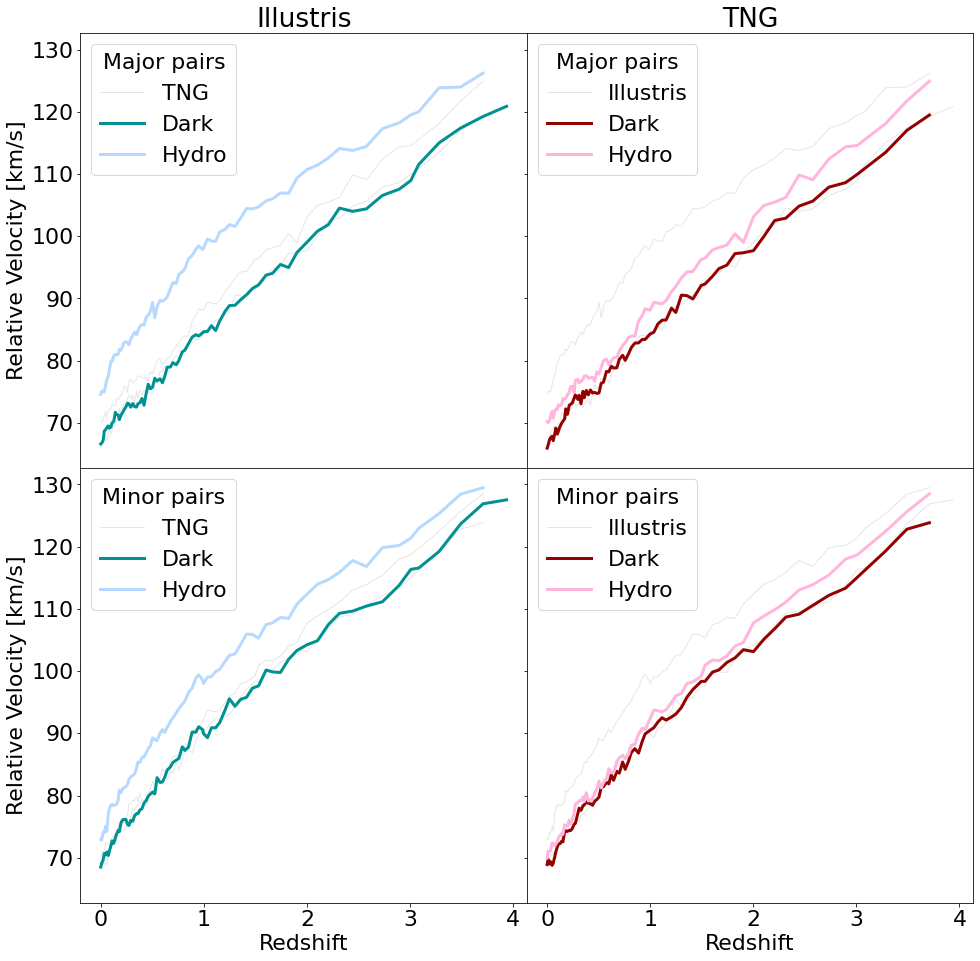

In [10]:
fig,ax = plt.subplots(2,2,figsize=(16,16),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0)

# plot for Illustris dark vs. TNG dark and Hydro v hydro for dwarfs

simNames = ["Illustris", "TNG"]
altsize = 1
altalpha = 0.2

# left plot (Illustris)
ax[0][0].set_title("Illustris")
ax[0][0].plot(data_summary['TNG']["dark"]['Redshift'], data_summary['TNG']['dark']['Median RelVel'], color='grey',alpha=altalpha,lw=altsize)
ax[0][0].plot(data_summary['TNG']["hydro"]['Redshift'], data_summary['TNG']["hydro"]['Median RelVel'], label="TNG", color='grey',alpha=altalpha,lw=altsize)
ax[0][0].plot(data_summary['Illustris']["dark"]['Redshift'], data_summary['Illustris']["dark"]['Median RelVel'], label="Dark", color=palette['Illustris dark'], lw=3)
ax[0][0].plot(data_summary['Illustris']["hydro"]['Redshift'], data_summary['Illustris']["hydro"]['Median RelVel'], label="Hydro", color=palette['Illustris hydro'], lw=3)

ax[0][1].set_title("TNG")
ax[0][1].plot(data_summary['Illustris']["dark"]['Redshift'], data_summary['Illustris']["dark"]['Median RelVel'], color='grey',alpha=altalpha,lw=altsize)
ax[0][1].plot(data_summary['Illustris']["hydro"]['Redshift'], data_summary['Illustris']["hydro"]['Median RelVel'], label="Illustris", color='grey',alpha=altalpha,lw=altsize)
ax[0][1].plot(data_summary['TNG']["dark"]['Redshift'], data_summary['TNG']["dark"]['Median RelVel'], label="Dark", color=palette['TNG dark'], lw=3)
ax[0][1].plot(data_summary['TNG']["hydro"]['Redshift'], data_summary['TNG']["hydro"]['Median RelVel'], label="Hydro", color=palette['TNG hydro'], lw=3)


ax[1][0].plot(data_summary_minor['TNG']["dark"]['Redshift'], data_summary_minor['TNG']['dark']['Median RelVel'], color='grey',alpha=altalpha,lw=altsize)
ax[1][0].plot(data_summary_minor['TNG']["hydro"]['Redshift'], data_summary_minor['TNG']["hydro"]['Median RelVel'], label="TNG", color='grey',alpha=altalpha,lw=altsize)
ax[1][0].plot(data_summary_minor['Illustris']["dark"]['Redshift'], data_summary_minor['Illustris']["dark"]['Median RelVel'], label="Dark", color=palette['Illustris dark'], lw=3)
ax[1][0].plot(data_summary_minor['Illustris']["hydro"]['Redshift'], data_summary_minor['Illustris']["hydro"]['Median RelVel'], label="Hydro", color=palette['Illustris hydro'], lw=3)

ax[1][1].plot(data_summary_minor['Illustris']["dark"]['Redshift'], data_summary_minor['Illustris']["dark"]['Median RelVel'], color='grey',alpha=altalpha,lw=altsize)
ax[1][1].plot(data_summary_minor['Illustris']["hydro"]['Redshift'], data_summary_minor['Illustris']["hydro"]['Median RelVel'], label="Illustris", color='grey',alpha=altalpha,lw=altsize)
ax[1][1].plot(data_summary_minor['TNG']["dark"]['Redshift'], data_summary_minor['TNG']["dark"]['Median RelVel'], label="Dark", color=palette['TNG dark'], lw=3)
ax[1][1].plot(data_summary_minor['TNG']["hydro"]['Redshift'], data_summary_minor['TNG']["hydro"]['Median RelVel'], label="Hydro", color=palette['TNG hydro'], lw=3)



for i in ax[1]:
    i.set_xlabel("Redshift")

ax[0][0].legend(title="Major pairs",loc="upper left")
ax[0][1].legend(title="Major pairs",loc="upper left")
ax[1][0].legend(title="Minor pairs",loc="upper left")
ax[1][1].legend(title="Minor pairs",loc="upper left")
ax[0][0].set_ylabel("Relative Velocity [km/s]")
ax[1][0].set_ylabel("Relative Velocity [km/s]")
# ax[1][0].set_ylabel("Separation")
# ax[1][1].set_ylabel("Separation")

plt.show()


In [25]:
data_summary['TNG']['dark']["Median Separation Quartiles"]

[array([ 7.2961502 , 23.60479176]),
 array([19.25526534, 34.3504271 ]),
 array([11.82316085, 40.68296304]),
 array([12.39520449, 52.33000183]),
 array([ 8.81666961, 59.44165777]),
 array([13.11321451, 62.38753344]),
 array([10.00427995, 50.61095969]),
 array([11.93058374, 50.12008659]),
 array([10.10947931, 53.68780001]),
 array([10.09963062, 53.33775558]),
 array([10.46925287, 54.81619336]),
 array([11.62730316, 57.34194012]),
 array([12.01969262, 59.01331179]),
 array([12.38939655, 60.80887778]),
 array([12.89493274, 62.66069816]),
 array([13.56325614, 66.49548226]),
 array([13.98144502, 67.49179135]),
 array([14.86607552, 70.60507614]),
 array([15.08666587, 72.45662321]),
 array([15.34904142, 74.42975045]),
 array([16.20415013, 80.57299022]),
 array([17.12613502, 81.62064961]),
 array([17.47348304, 85.36221096]),
 array([18.26012668, 87.19236859]),
 array([18.62914218, 90.76064693]),
 array([19.42144248, 93.82560275]),
 array([19.75068521, 96.17714817]),
 array([20.06053829, 98.4241

In [17]:
data_summary['TNG']['dark'].keys()

dict_keys(['Redshift', 'Snapshot', 'Number pairs', 'Number primaries', 'Ratio pairs', 'Median Separation', 'Median Separation Quartiles', 'Mean Separation', 'Mean Separation Std', 'Median RelVel', 'Median RelVel Quartiles', 'Mean RelVel', 'Mean RelVel Std'])

In [ ]:
Illustris, TNG = {}, {}
for key in f.keys():
    Illustris[key], TNG[key] = {}, {}
    
    if key=="Header":
        for headkey, headval in f[key].attrs.items():
            Illustris[key][headkey] = np.array(headval)
        for headkey, headval in g[key].attrs.items():
            TNG[key][headkey] = np.array(headval)
            
    
    else:
        for subkey in f[key].keys():
            Illustris[key][subkey], TNG[key][subkey] = {}, {}
            
            for subsubkey, val in f[key][subkey].items():
                Illustris[key][subkey][subsubkey] = np.array(val)
            for subsubkey, val in g[key][subkey].items():
                TNG[key][subkey][subsubkey] = np.array(val)


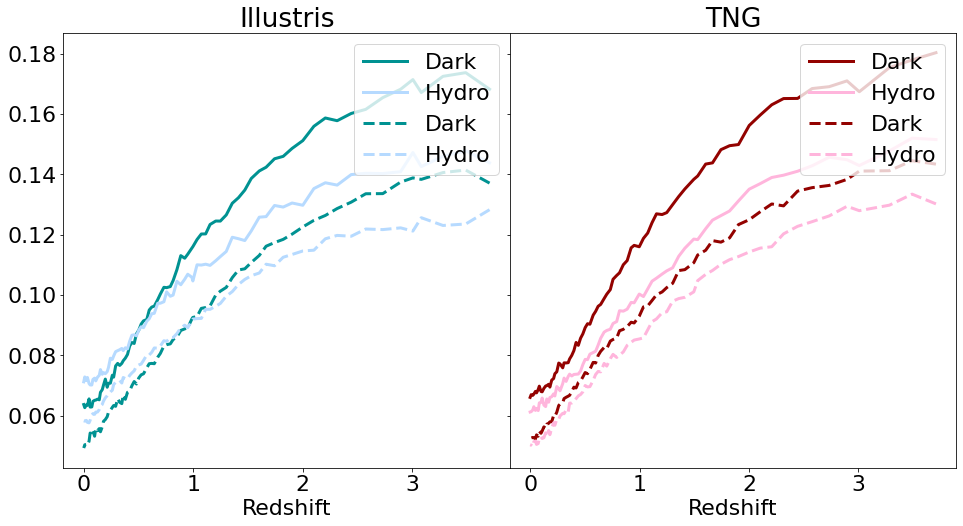

In [14]:
fig,ax = plt.subplots(1,2,figsize=(16,8),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0)

# plot for Illustris dark vs. TNG dark and Hydro v hydro for dwarfs

simNames = ["Illustris", "TNG"]
keytoplot = "Ratio pairs"
altsize = 1
altalpha = 0.2

# left plot (Illustris)
ax[0].set_title("Illustris")
# ax[0].plot(data_summary['TNG']["dark"]['Redshift'], data_summary['TNG']['dark'][keytoplot], color='grey',alpha=altalpha,lw=altsize)
# ax[0].plot(data_summary['TNG']["hydro"]['Redshift'], data_summary['TNG']["hydro"][keytoplot], label="TNG", color='grey',alpha=altalpha,lw=altsize)
ax[0].plot(data_summary['Illustris']["dark"]['Redshift'], data_summary['Illustris']["dark"][keytoplot], label="Dark", color=palette['Illustris dark'], lw=3)
ax[0].plot(data_summary['Illustris']["hydro"]['Redshift'], data_summary['Illustris']["hydro"][keytoplot], label="Hydro", color=palette['Illustris hydro'], lw=3)

ax[1].set_title("TNG")
# ax[1].plot(data_summary['Illustris']["dark"]['Redshift'], data_summary['Illustris']["dark"][keytoplot], color='grey',alpha=altalpha,lw=altsize)
# ax[1].plot(data_summary['Illustris']["hydro"]['Redshift'], data_summary['Illustris']["hydro"][keytoplot], label="Illustris", color='grey',alpha=altalpha,lw=altsize)
ax[1].plot(data_summary['TNG']["dark"]['Redshift'], data_summary['TNG']["dark"][keytoplot], label="Dark", color=palette['TNG dark'], lw=3)
ax[1].plot(data_summary['TNG']["hydro"]['Redshift'], data_summary['TNG']["hydro"][keytoplot], label="Hydro", color=palette['TNG hydro'], lw=3)


# ax[0].plot(data_summary_minor['TNG']["dark"]['Redshift'], data_summary_minor['TNG']['dark'][keytoplot], color='grey',alpha=altalpha,lw=altsize)
# ax[0].plot(data_summary_minor['TNG']["hydro"]['Redshift'], data_summary_minor['TNG']["hydro"][keytoplot], label="TNG", color='grey',alpha=altalpha,lw=altsize)
ax[0].plot(data_summary_minor['Illustris']["dark"]['Redshift'], data_summary_minor['Illustris']["dark"][keytoplot], label="Dark", color=palette['Illustris dark'], lw=3,linestyle="dashed")
ax[0].plot(data_summary_minor['Illustris']["hydro"]['Redshift'], data_summary_minor['Illustris']["hydro"][keytoplot], label="Hydro", color=palette['Illustris hydro'], lw=3,linestyle="dashed")

# ax[1].plot(data_summary_minor['Illustris']["dark"]['Redshift'], data_summary_minor['Illustris']["dark"][keytoplot], color='grey',alpha=altalpha,lw=altsize)
# ax[1].plot(data_summary_minor['Illustris']["hydro"]['Redshift'], data_summary_minor['Illustris']["hydro"][keytoplot], label="Illustris", color='grey',alpha=altalpha,lw=altsize)
ax[1].plot(data_summary_minor['TNG']["dark"]['Redshift'], data_summary_minor['TNG']["dark"][keytoplot], label="Dark", color=palette['TNG dark'], lw=3,linestyle="dashed")
ax[1].plot(data_summary_minor['TNG']["hydro"]['Redshift'], data_summary_minor['TNG']["hydro"][keytoplot], label="Hydro", color=palette['TNG hydro'], lw=3,linestyle="dashed")



for i in ax:
    i.set_xlabel("Redshift")

ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")

# ax[0][0].set_ylabel("Separation")
# ax[1][0].set_ylabel("Separation")
# ax[1][0].set_ylabel("Separation")
# ax[1][1].set_ylabel("Separation")

plt.show()


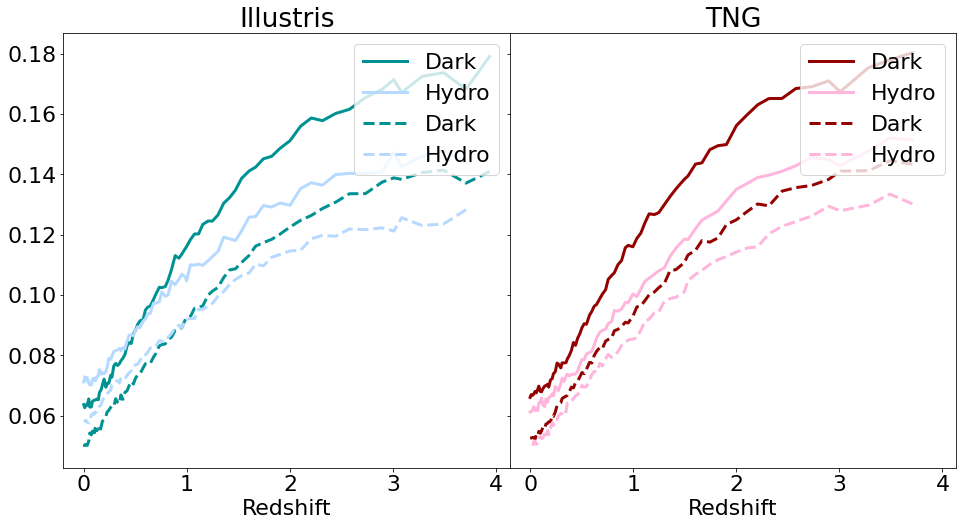

In [6]:
fig,ax = plt.subplots(1,2,figsize=(16,8),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0)

# plot for Illustris dark vs. TNG dark and Hydro v hydro for dwarfs

simNames = ["Illustris", "TNG"]
keytoplot = "Ratio pairs"
altsize = 1
altalpha = 0.2

# left plot (Illustris)
ax[0].set_title("Illustris")
# ax[0].plot(data_summary['TNG']["dark"]['Redshift'], data_summary['TNG']['dark'][keytoplot], color='grey',alpha=altalpha,lw=altsize)
# ax[0].plot(data_summary['TNG']["hydro"]['Redshift'], data_summary['TNG']["hydro"][keytoplot], label="TNG", color='grey',alpha=altalpha,lw=altsize)
ax[0].plot(data_summary['Illustris']["dark"]['Redshift'], data_summary['Illustris']["dark"][keytoplot], label="Dark", color=palette['Illustris dark'], lw=3)
ax[0].plot(data_summary['Illustris']["hydro"]['Redshift'], data_summary['Illustris']["hydro"][keytoplot], label="Hydro", color=palette['Illustris hydro'], lw=3)

ax[1].set_title("TNG")
# ax[1].plot(data_summary['Illustris']["dark"]['Redshift'], data_summary['Illustris']["dark"][keytoplot], color='grey',alpha=altalpha,lw=altsize)
# ax[1].plot(data_summary['Illustris']["hydro"]['Redshift'], data_summary['Illustris']["hydro"][keytoplot], label="Illustris", color='grey',alpha=altalpha,lw=altsize)
ax[1].plot(data_summary['TNG']["dark"]['Redshift'], data_summary['TNG']["dark"][keytoplot], label="Dark", color=palette['TNG dark'], lw=3)
ax[1].plot(data_summary['TNG']["hydro"]['Redshift'], data_summary['TNG']["hydro"][keytoplot], label="Hydro", color=palette['TNG hydro'], lw=3)


# ax[0].plot(data_summary_minor['TNG']["dark"]['Redshift'], data_summary_minor['TNG']['dark'][keytoplot], color='grey',alpha=altalpha,lw=altsize)
# ax[0].plot(data_summary_minor['TNG']["hydro"]['Redshift'], data_summary_minor['TNG']["hydro"][keytoplot], label="TNG", color='grey',alpha=altalpha,lw=altsize)
ax[0].plot(data_summary_minor['Illustris']["dark"]['Redshift'], data_summary_minor['Illustris']["dark"][keytoplot], label="Dark", color=palette['Illustris dark'], lw=3,linestyle="dashed")
ax[0].plot(data_summary_minor['Illustris']["hydro"]['Redshift'], data_summary_minor['Illustris']["hydro"][keytoplot], label="Hydro", color=palette['Illustris hydro'], lw=3,linestyle="dashed")

# ax[1].plot(data_summary_minor['Illustris']["dark"]['Redshift'], data_summary_minor['Illustris']["dark"][keytoplot], color='grey',alpha=altalpha,lw=altsize)
# ax[1].plot(data_summary_minor['Illustris']["hydro"]['Redshift'], data_summary_minor['Illustris']["hydro"][keytoplot], label="Illustris", color='grey',alpha=altalpha,lw=altsize)
ax[1].plot(data_summary_minor['TNG']["dark"]['Redshift'], data_summary_minor['TNG']["dark"][keytoplot], label="Dark", color=palette['TNG dark'], lw=3,linestyle="dashed")
ax[1].plot(data_summary_minor['TNG']["hydro"]['Redshift'], data_summary_minor['TNG']["hydro"][keytoplot], label="Hydro", color=palette['TNG hydro'], lw=3,linestyle="dashed")



for i in ax:
    i.set_xlabel("Redshift")

ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")

# ax[0][0].set_ylabel("Separation")
# ax[1][0].set_ylabel("Separation")
# ax[1][0].set_ylabel("Separation")
# ax[1][1].set_ylabel("Separation")

plt.show()
